In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
%matplotlib inline
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

^ Torchvision is a helper package for loading common image datasets.

When using torchvision, you can specify transformations to perfrom on load using a `transformer`. These are created using the `transforms` module imported above.

Here we're going to normalize them.

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


### Do a little inspection of the data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Our simple convnet

In [6]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

## Our simple loss function - SGD

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 
# ^ Remember, we pass our paramters to the optimizer directly

## Run a few loops of training

In [9]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.165
[1,  4000] loss: 1.870
[1,  6000] loss: 1.702
[1,  8000] loss: 1.599
[1, 10000] loss: 1.491
[1, 12000] loss: 1.423
[2,  2000] loss: 1.385
[2,  4000] loss: 1.334
[2,  6000] loss: 1.305
[2,  8000] loss: 1.264
[2, 10000] loss: 1.270
[2, 12000] loss: 1.258
Finished Training


### Pass some examples through

In [10]:
data_iter = iter(testloader)

Process Process-8:
Process Process-7:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.frame

In [12]:
images, labels = dataiter.next()

GroundTruth:    dog  deer plane  ship


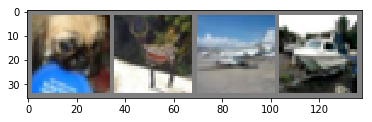

In [13]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
outputs = net(Variable(images))

In [18]:
print(outputs)

Variable containing:
-0.1929 -0.0427 -0.5580  1.8065 -1.3942  0.7525  1.0199 -1.2382 -0.1062  0.0627
-0.4713 -0.2703  0.7050  0.2842  3.2298 -0.1895  1.7206  0.2490 -3.0183 -2.2859
 3.9094 -0.2257  0.6848 -1.4313  0.7503 -2.0866 -2.9927 -0.2225  2.0354 -0.4627
 2.4144  6.0651 -2.1860 -2.1684 -4.0214 -3.5161 -3.5642 -2.8051  4.0113  4.1203
[torch.FloatTensor of size 4x10]



In [19]:
_, pred = torch.max(outputs.data, 1)

In [21]:
print('Predicted: ', ' '.join('%5s' % classes[pred[j]]
                              for j in range(4)))

Predicted:    cat  deer plane   car


## Assess over all data

In [22]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


Which classess work well?

In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 74 %
Accuracy of  bird : 28 %
Accuracy of   cat : 18 %
Accuracy of  deer : 35 %
Accuracy of   dog : 27 %
Accuracy of  frog : 82 %
Accuracy of horse : 75 %
Accuracy of  ship : 64 %
Accuracy of truck : 74 %


# -- Here ends the PyTorch tutorial -- #
But as an extension: can we analyse the preferences of the different neurons in our network?

## Start with fully-connected layers, since that's easy

We're going to feed a bunch of examples of each class, record the activity of each neuron, then visualize in a matrix.

From the discussion [here](https://discuss.pytorch.org/t/how-to-extract-features-of-an-image-from-a-trained-model/119/5) it seems like this isn't going to be very easy post-hoc. 

The best thing is therefore to return the intermediate activations as part of the forward pass, and evaluate as is. We can then make a nice video of our neurons acquiring preferences, which would be cool.

In [26]:
net.fc1.float()

Linear (400 -> 120)

In [159]:
class transparent_Net(nn.Module):
    
    def __init__(self):
        super(transparent_Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x, store=False):
        """ Here we return the activations of all 
        the intermediate layers as well as the output of
        the final fully-connected layer."""
        
        activations = {}
        if store:
            activations['conv1']=F.relu(self.conv1(x))
        
        x = self.pool(F.relu(self.conv1(x)))
        
        if store:
            activations['pool1'] = x
            activations['conv2'] = F.relu(self.conv2(x))
                
        x = self.pool(F.relu(self.conv2(x)))
        
        if store:
            activations['conv2'] = x
    
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        
        if store:
            activations['fc1'] = x
        
        x = F.relu(self.fc2(x))
        
        if store:
            activations['fc2'] = x
        
        x = self.fc3(x)
        
        if store:
            activations['fc3'] = x
        
        return x, activations


In [175]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(t_net.parameters(), lr=0.001, momentum=0.9) 

We have to redefine the test loader to get a single sample batch, otherwise our neuron activations are going to be averages. 

In [174]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

t_net = transparent_Net()

In [176]:
test_images = iter(testloader)

activation_list = []

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):

        # forward + backward + optimize
        if (i % 1000 is 0) or (i == 1):
            classes = np.zeros(10)
            
            # Inefficient, but since we have a data generator we can't control which classes we get. So we're going to loop until 
            # we get an example of each for each timestep.
            while sum(classes) < 10: # We lack an example of each class
                
                # get the inputs
                inputs, labels = test_images.next()

                if classes[labels.numpy()[0]] == 0: # We want this one!
                    # wrap them in Variable
                    inputs, labels = Variable(inputs), Variable(labels)
                    _, activations = t_net(inputs, store=True)
                    activation_list.append({'epoch': epoch, 
                                           'i': i + 49000*epoch,
                                           'label': labels,
                                           'activations': activations})
                    
                    classes[labels.data.numpy()[0]] = 1 # Regiser that we have this class
                else:
                    pass
            
        else:
            
            # get the inputs
            inputs, labels = data

            # wrap them in Variable
            inputs, labels = Variable(inputs), Variable(labels)
            
            # zero the parameter gradients
            optimizer.zero_grad()

            outputs, _ = t_net(inputs)
        
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.200
[1,  4000] loss: 1.821
[1,  6000] loss: 1.656
[1,  8000] loss: 1.548
[1, 10000] loss: 1.487
[1, 12000] loss: 1.457
[2,  2000] loss: 1.377
[2,  4000] loss: 1.355
[2,  6000] loss: 1.343
[2,  8000] loss: 1.296
[2, 10000] loss: 1.308
[2, 12000] loss: 1.300
Finished Training


In [177]:
def get_activation_vector(activation_dict, layer):
    """ Given a dict with an activation and a label, returns a vector of activity
    for a given layer."""
    
    return activation_dict['activations'][layer].data.numpy().ravel()
    

In [178]:
def activation_vectors_to_matrix(activation_list, layer):
    
    # Initialize matrix
    activity = get_activation_vector(activation_list[0], layer)
    matrix = np.zeros((10, len(activity), activation_list[-1]['i']+1)) # Create 3D matrix
    
    for activation_dict in activation_list:
        activity = get_activation_vector(activation_dict, layer)
        matrix[activation_dict['label'].data.numpy()[0],:,activation_dict['i']] = activity

    return matrix

In [179]:
def plot_activation_matrix(matrix, i):
    
    plt.imshow(matrix[:,:,i])
    plt.axes().set_aspect(15)
    
    return 

In [139]:
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(20,6))

anim = FuncAnimation(fig, plot_activation_matrix, frames=np.arange(0, 10), interval=200)
anim.save('activations.gif', writer='ffmpeg', dpi=80)

/Users/archy/anaconda/envs/pytorch/lib/python3.6/site-packages/matplotlib/animation.py:1021: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: Cannot save animation: no writers are available. Please install ffmpeg to save animations.

In [200]:
filled = []
for t in range(0, matrix.shape[2]):
    if sum(matrix[:, :, t].ravel()) > 0:
        filled.append(t)

In [201]:
def create_image_sequence_from_matrix(matrix, filled):
    
    n_images = matrix.shape[2]
    
    for i in filled:
        fig = plt.figure(figsize=(20,6))
        plot_activation_matrix(matrix, i)
        plt.title('Training step %d'%i)
        plt.show()


In [229]:
matrix = activation_vectors_to_matrix(activation_list, 'fc2')

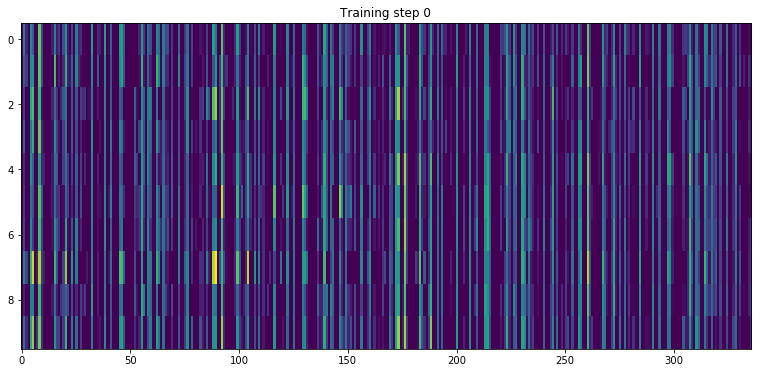

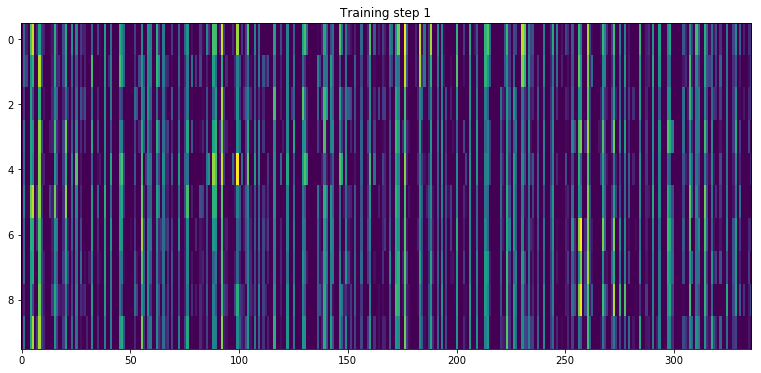

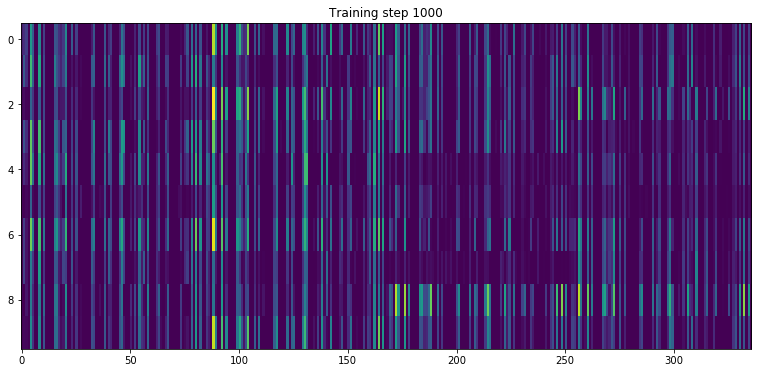

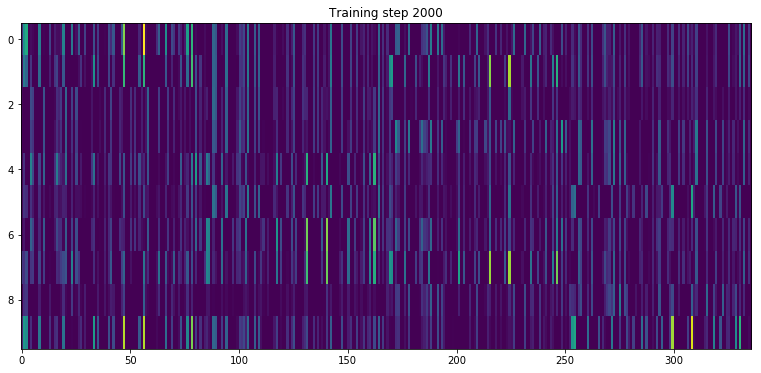

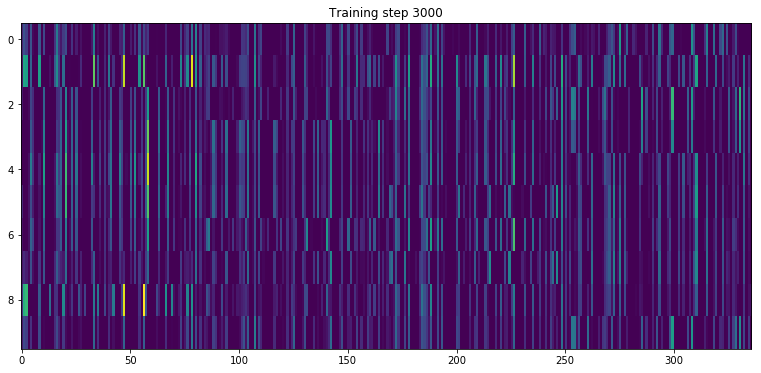

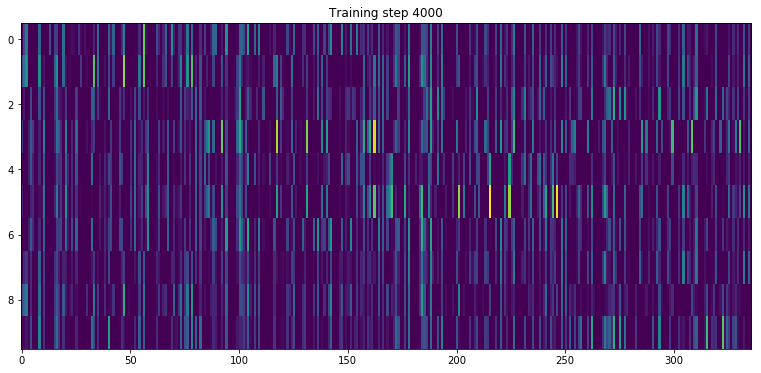

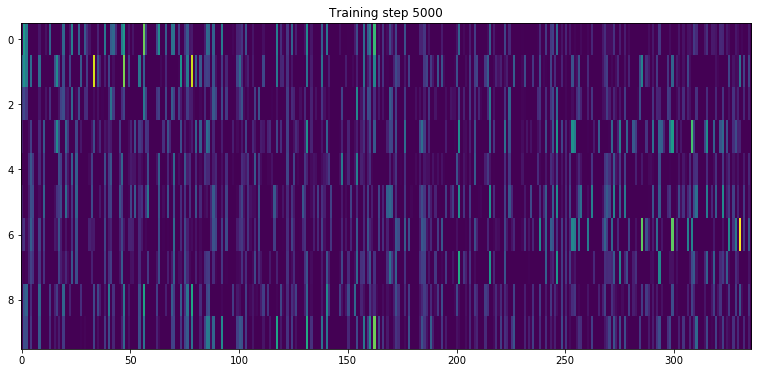

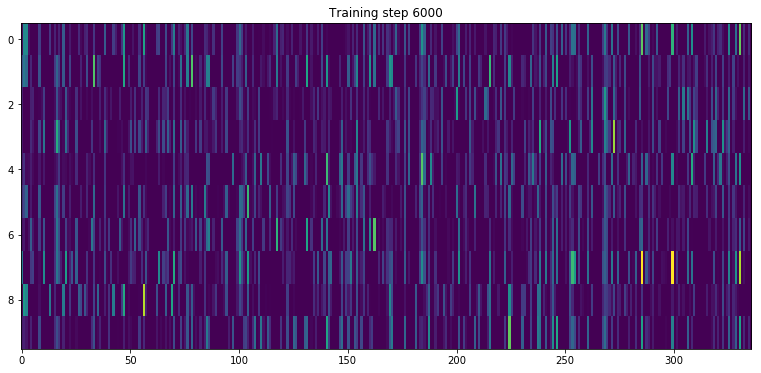

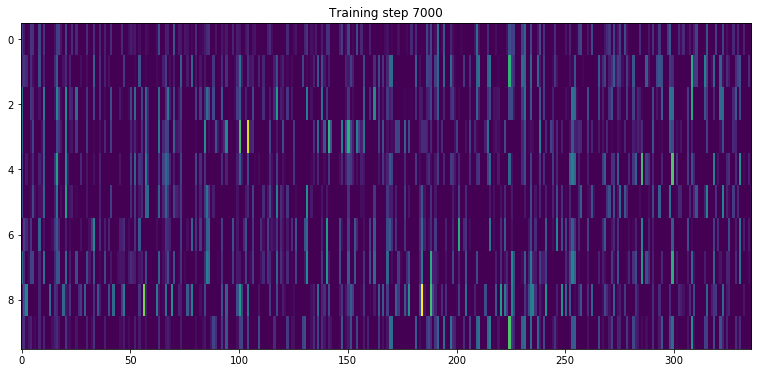

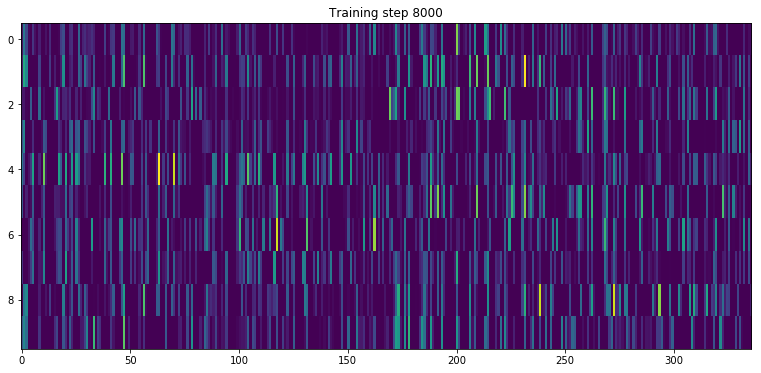

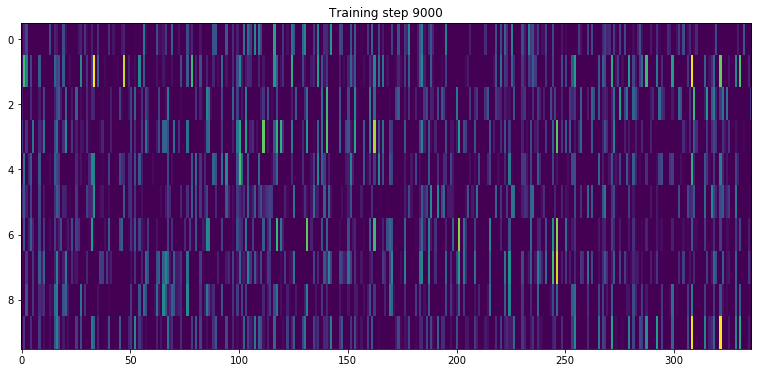

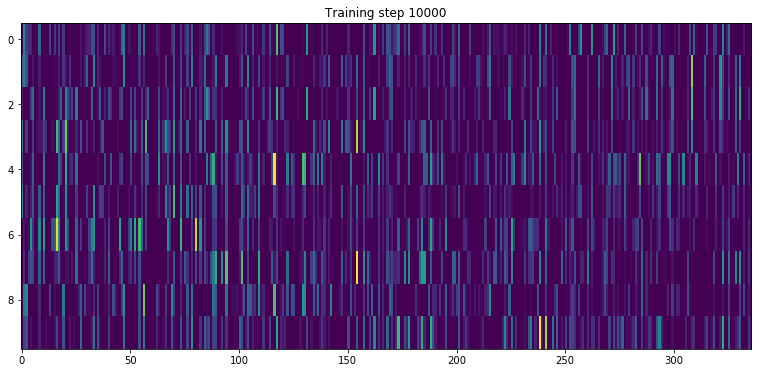

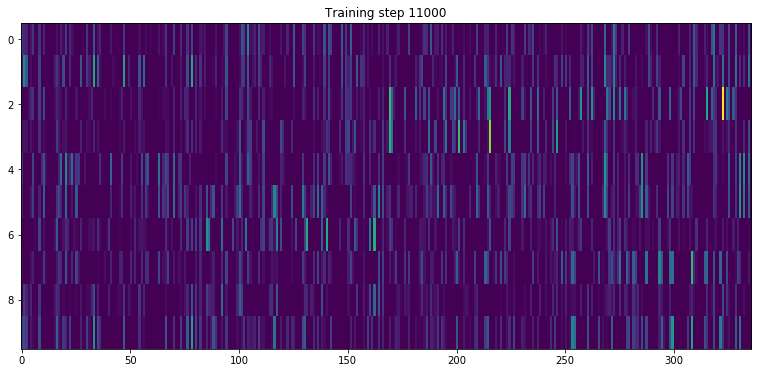

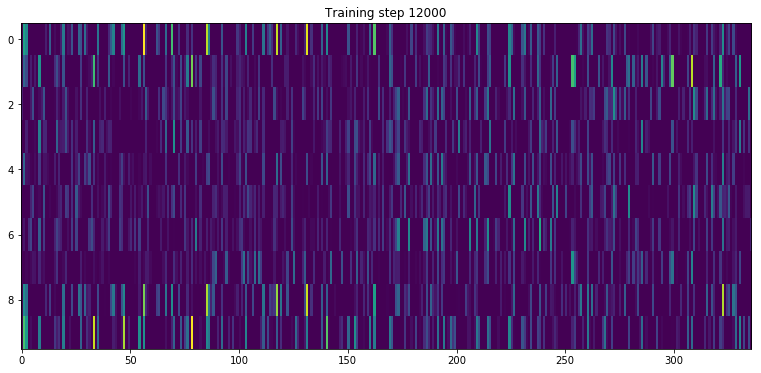

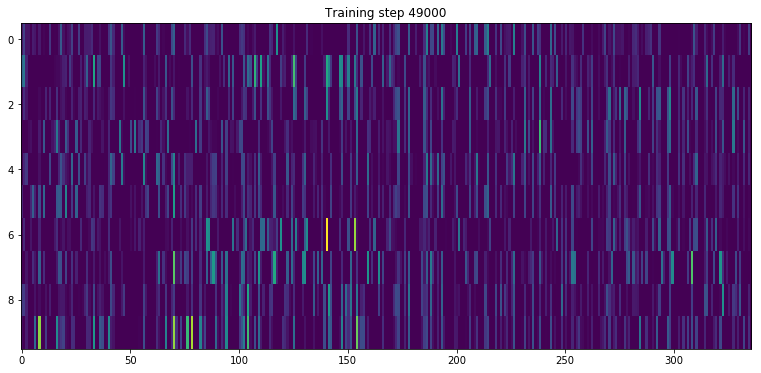

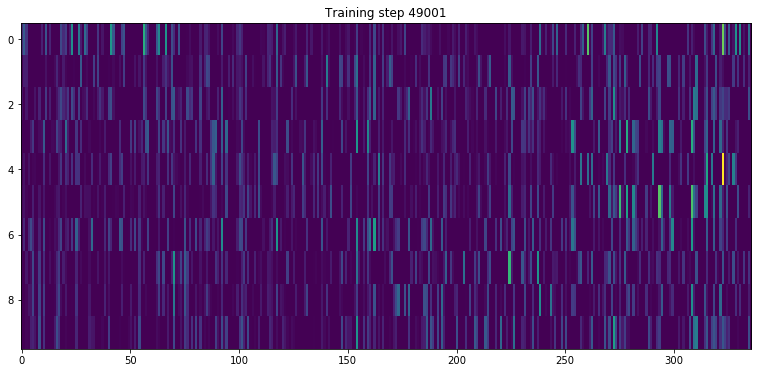

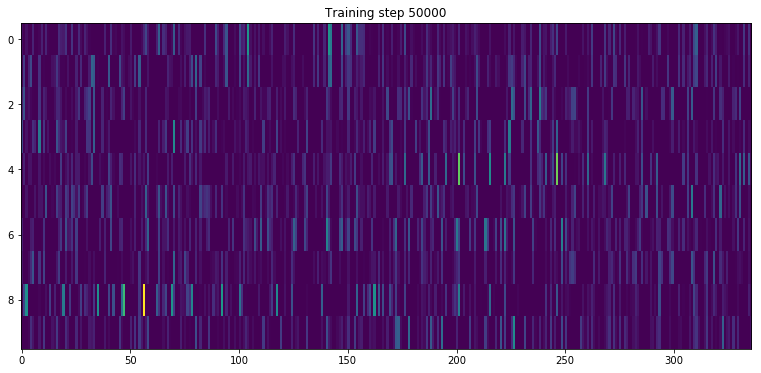

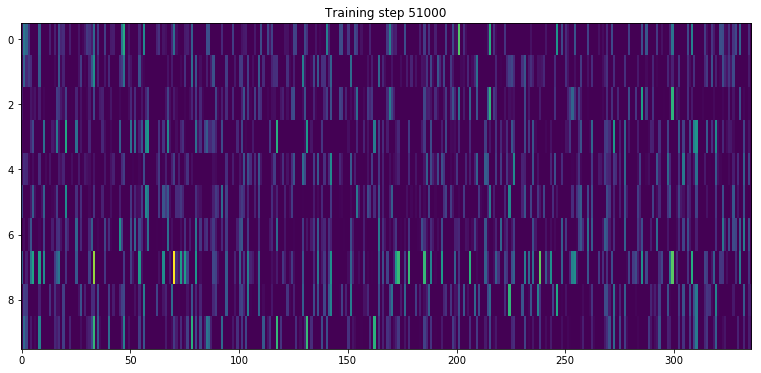

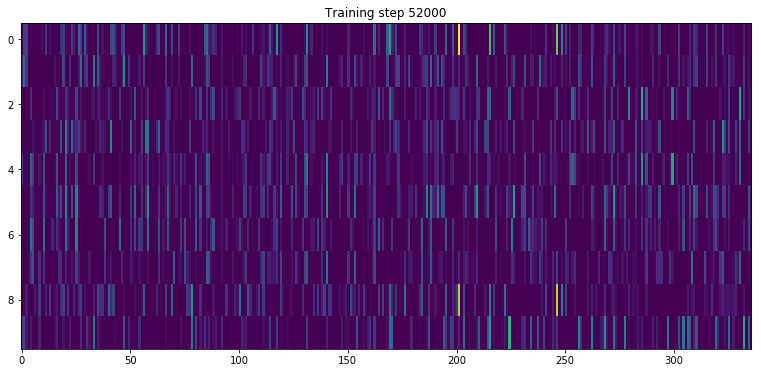

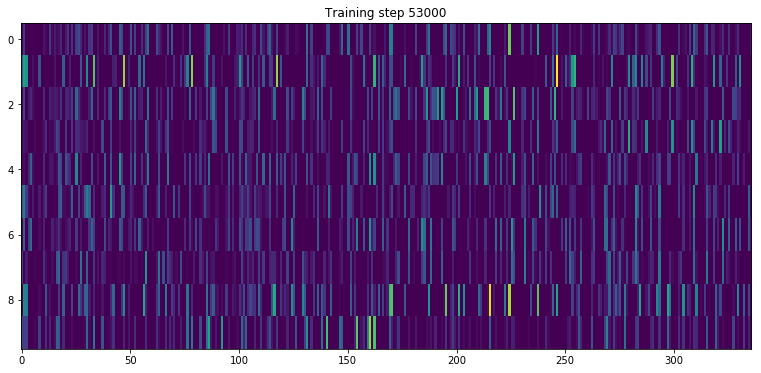

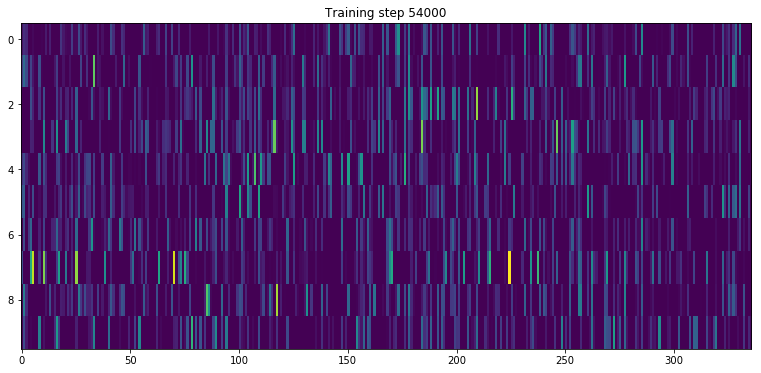

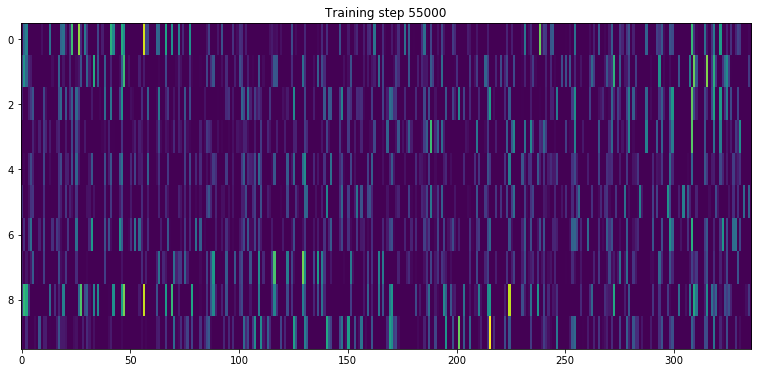

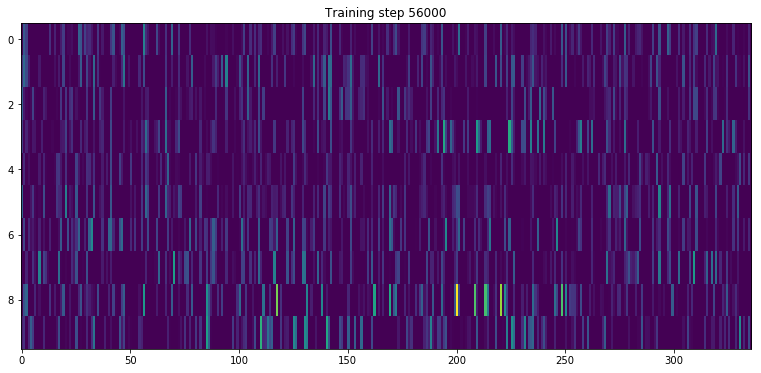

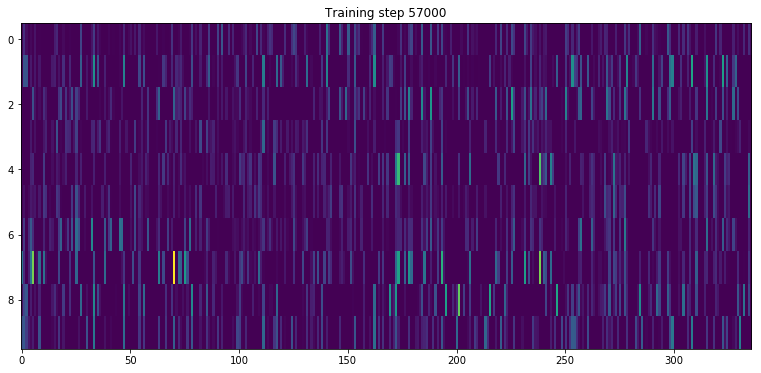

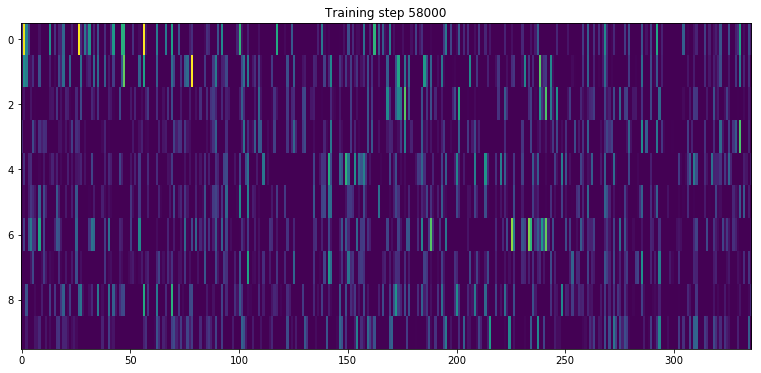

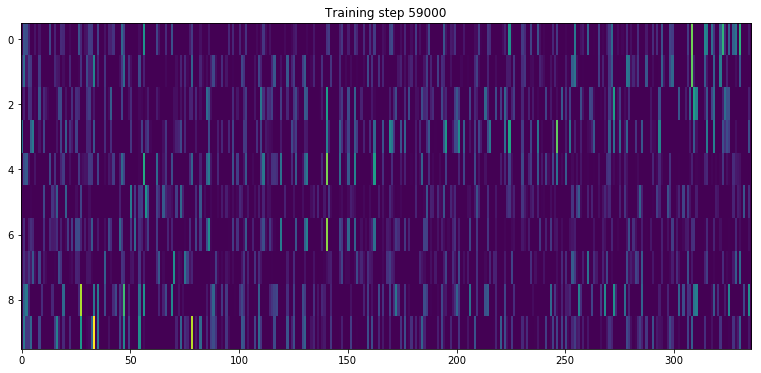

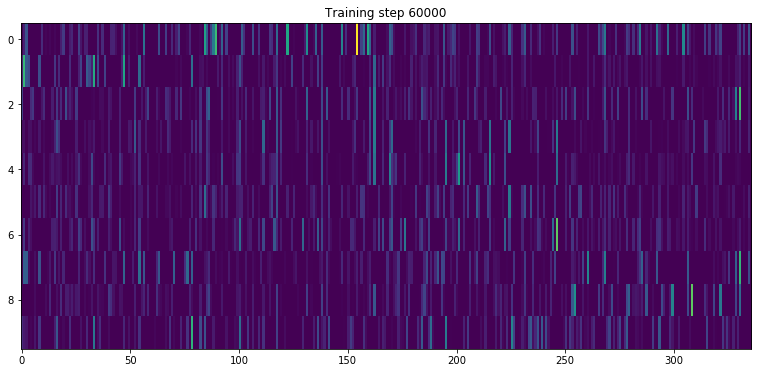

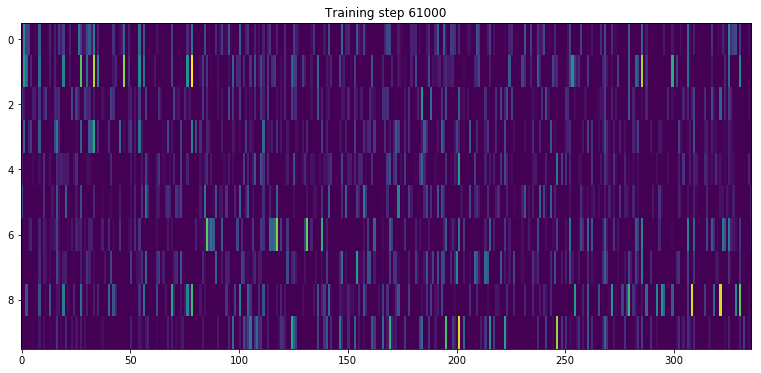

In [204]:
matrix = activation_vectors_to_matrix(activation_list, 'fc2')
matrix.shape
create_image_sequence_from_matrix(matrix, filled)

In [168]:
v = [activ['i'] for activ in activation_list]

In [170]:
list(range(2))

[0, 1]

In [195]:
matrix[:,:,1000]

array([[ 0.08215697,  0.14383495,  0.20132864, ...,  0.        ,
         0.19482508,  0.        ],
       [ 0.        ,  0.30709556,  0.14180686, ...,  0.        ,
         0.25557783,  0.        ],
       [ 0.        ,  0.03678695,  0.01155152, ...,  0.        ,
         0.46963534,  0.        ],
       ..., 
       [ 0.        ,  0.20374447,  0.05355445, ...,  0.        ,
         0.1905748 ,  0.0251688 ],
       [ 0.        ,  0.        ,  0.0636211 , ...,  0.        ,
         0.59101653,  0.        ],
       [ 0.        ,  0.02240629,  0.01763355, ...,  0.        ,
         0.22159296,  0.        ]])

In [230]:
# Remove empty dimensions
empties = np.sum(matrix, axis=1).sum(axis=0)==0
matrix = matrix[:,:,empties==False] 

In [231]:
matrix

array([[[  0.00000000e+00,   0.00000000e+00,   8.21569711e-02, ...,
           0.00000000e+00,   0.00000000e+00,   1.02901652e-01],
        [  7.84752071e-02,   5.40354960e-02,   1.43834949e-01, ...,
           1.60868788e+00,   6.78505182e-01,   2.48439479e+00],
        [  1.94042400e-02,   1.21647269e-02,   2.01328635e-01, ...,
           1.46073842e+00,   1.93829656e+00,   9.92842674e-01],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  5.84496185e-03,   2.07136814e-02,   1.94825083e-01, ...,
           3.87335896e-01,   1.86745560e+00,   1.92569822e-01],
        [  0.00000000e+00,   2.31229570e-02,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00]],

       [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           5.85341871e-01,   6.49894178e-01,   0.00000000e+00],
        [  5.22702746e-02,   5.67195825e-02,   3.07095557e-0

In [233]:
order = np.argsort(matrix[:,:,-1], axis=0)

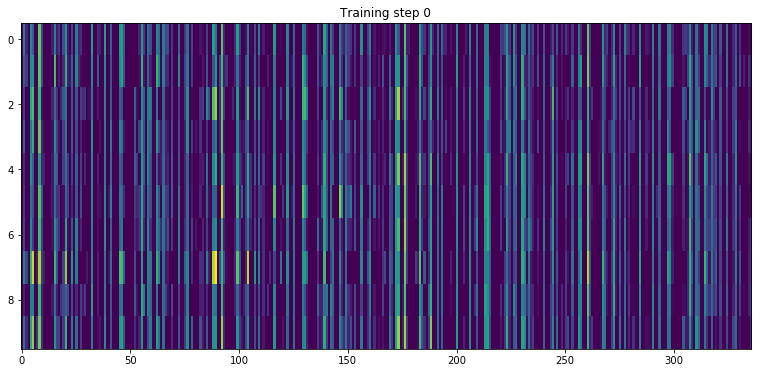

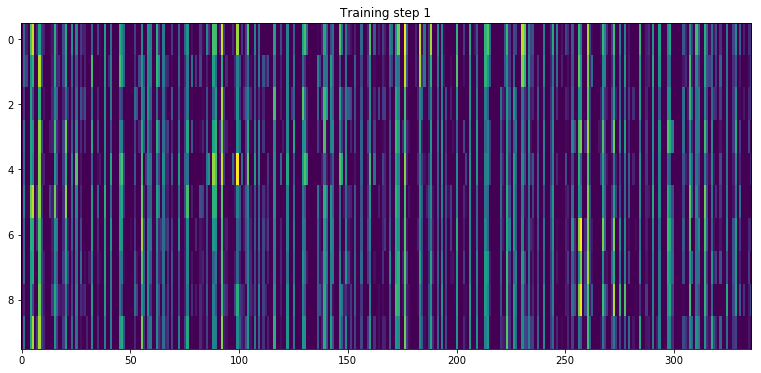

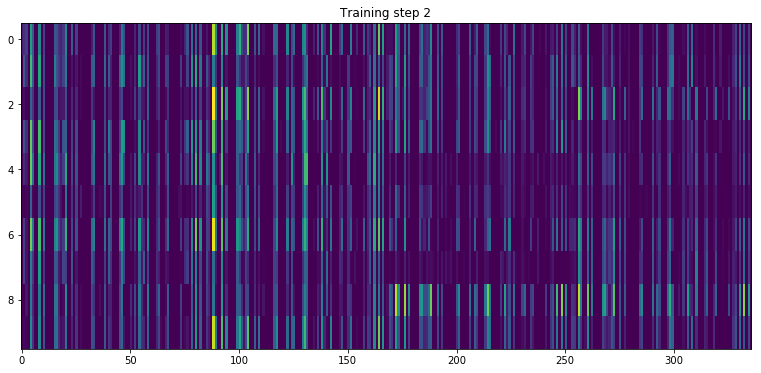

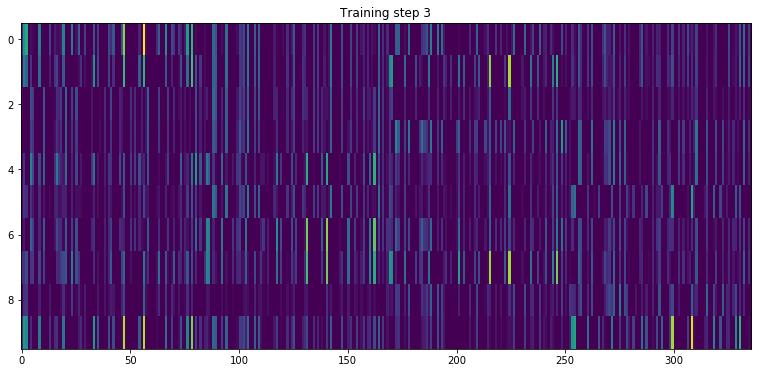

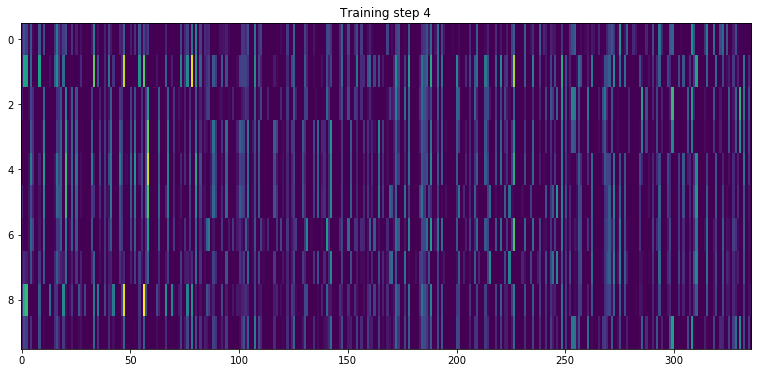

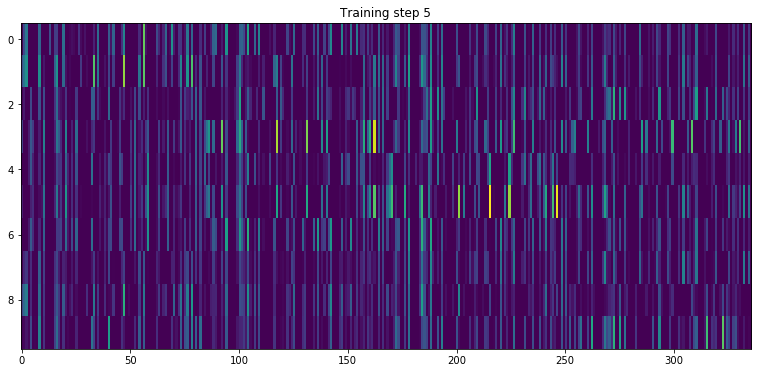

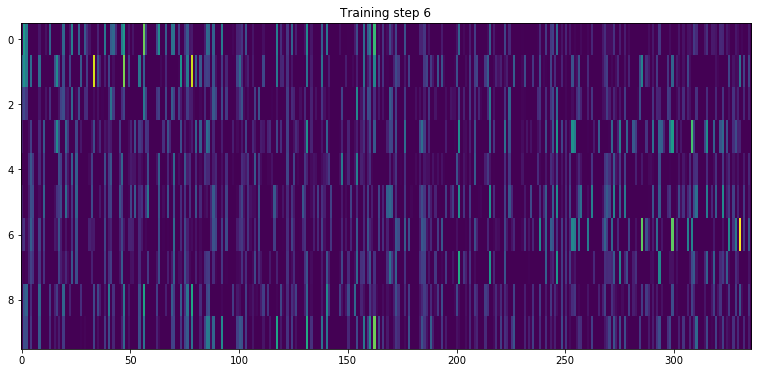

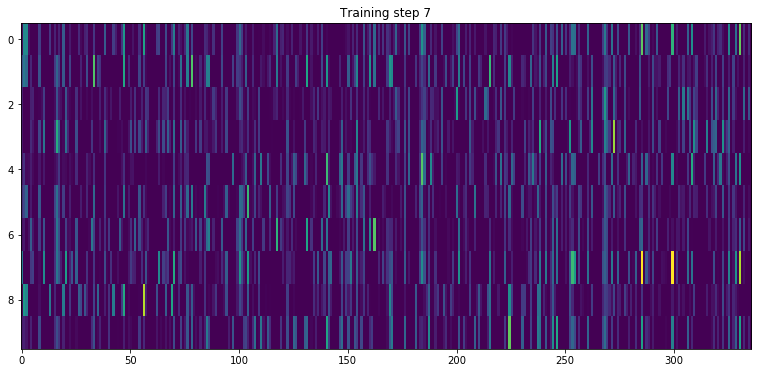

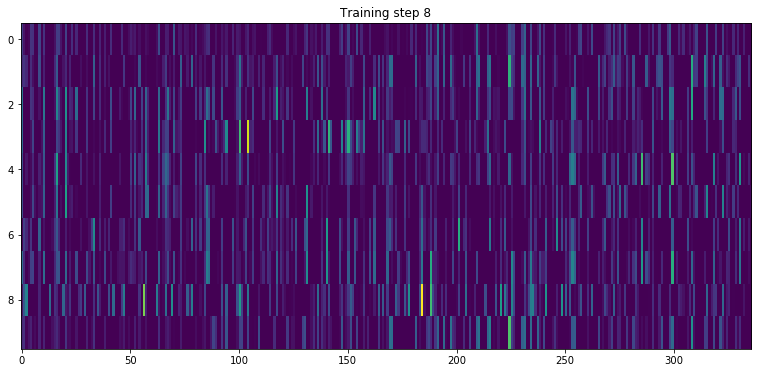

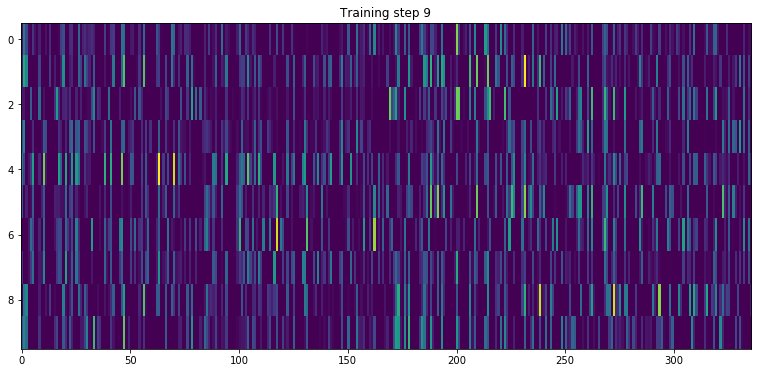

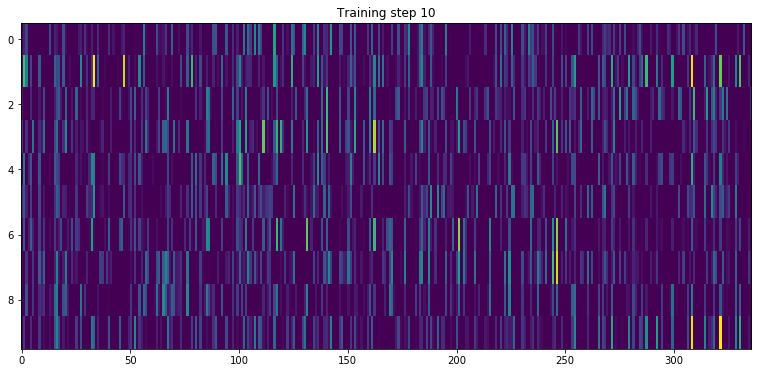

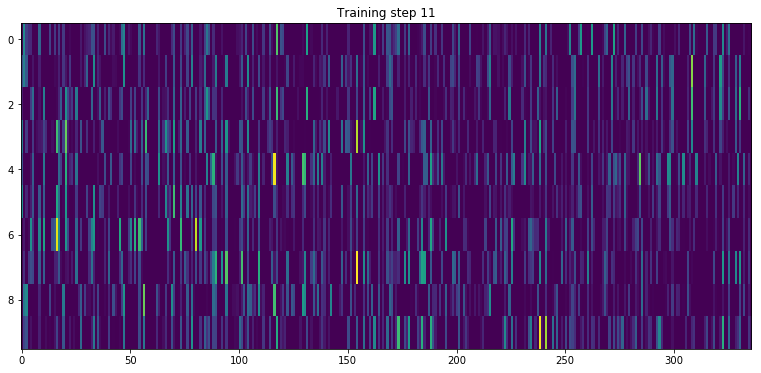

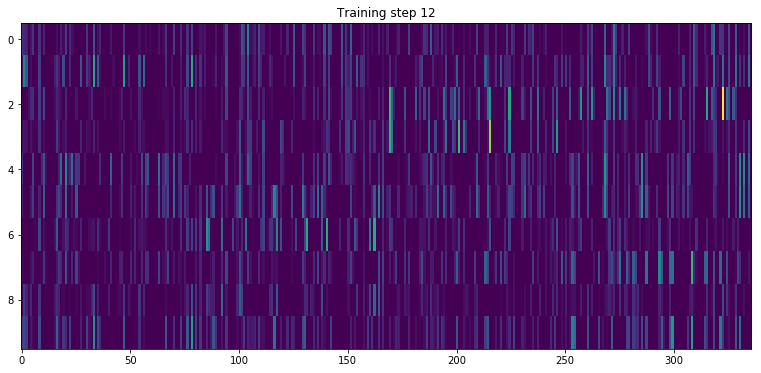

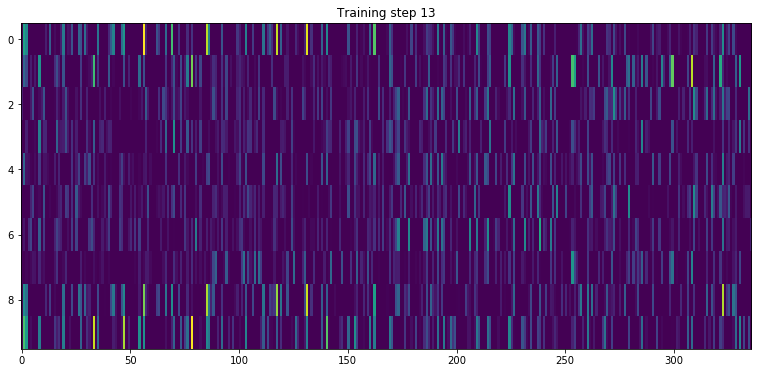

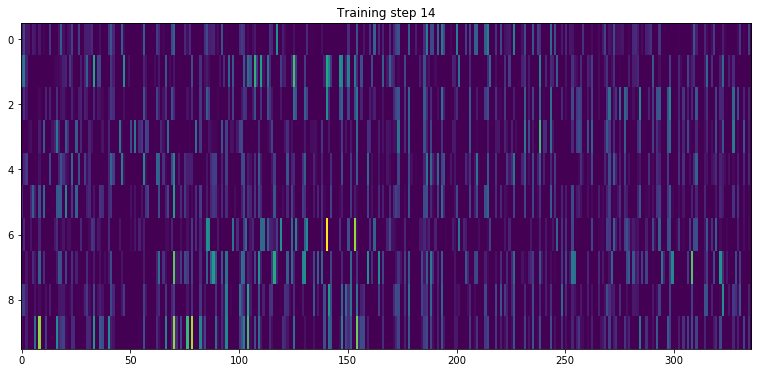

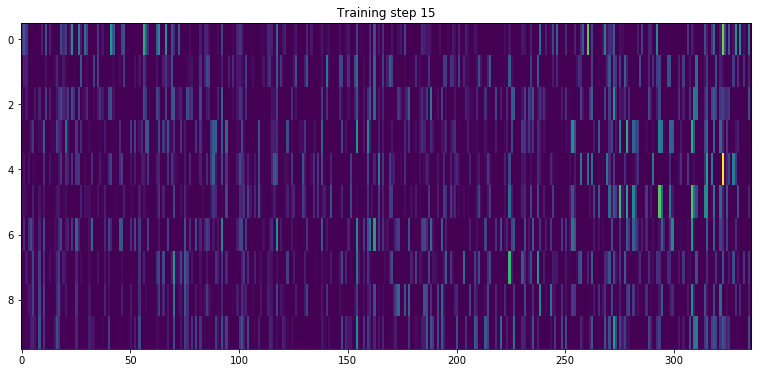

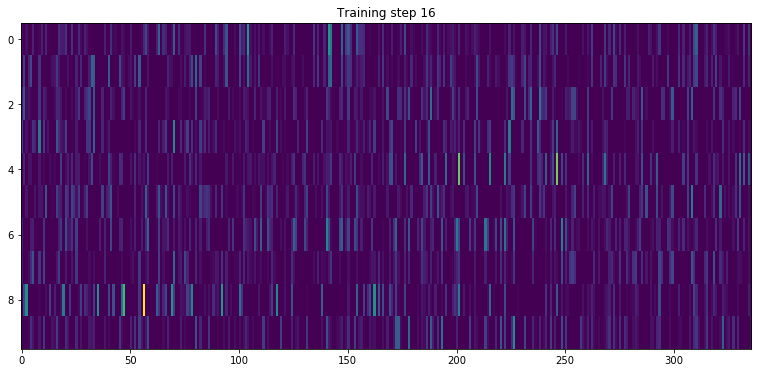

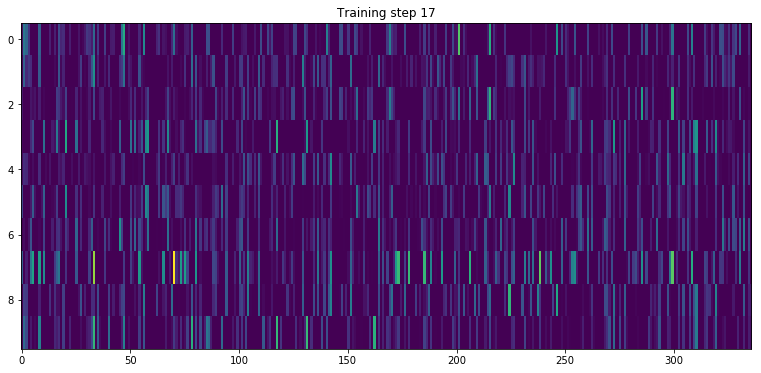

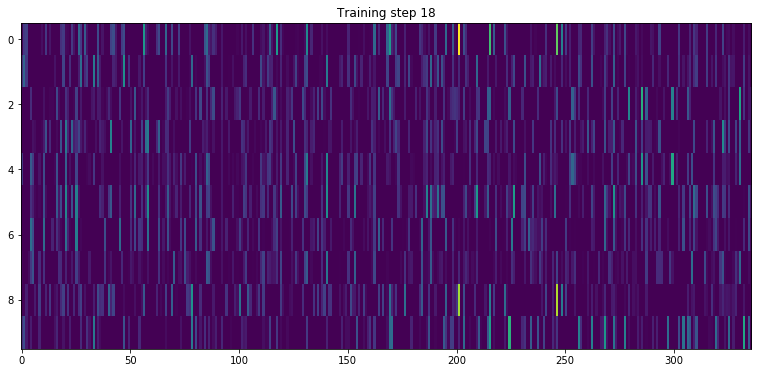

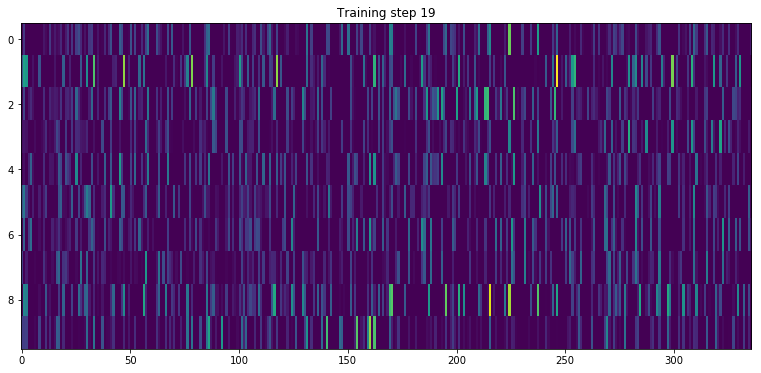

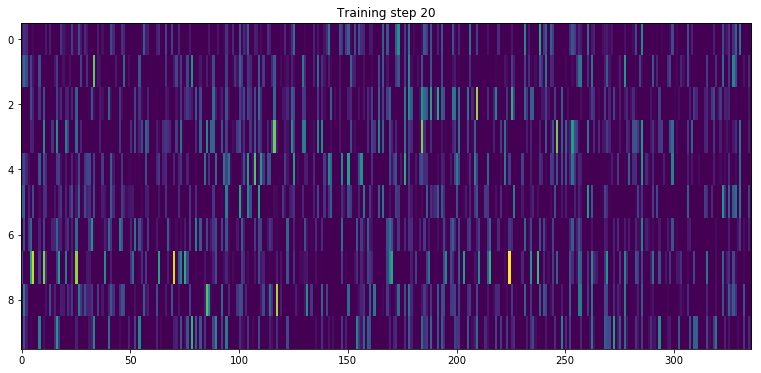

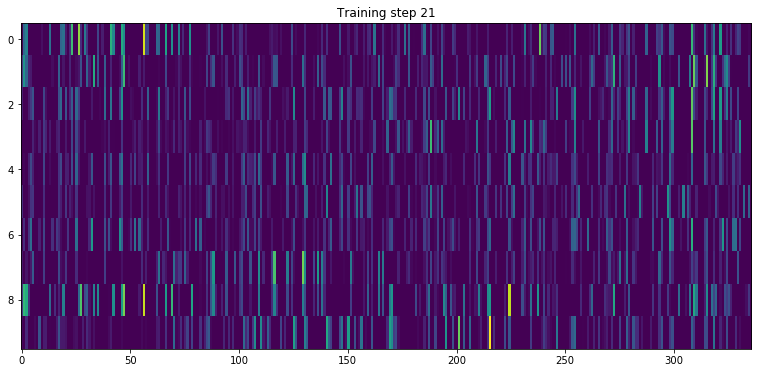

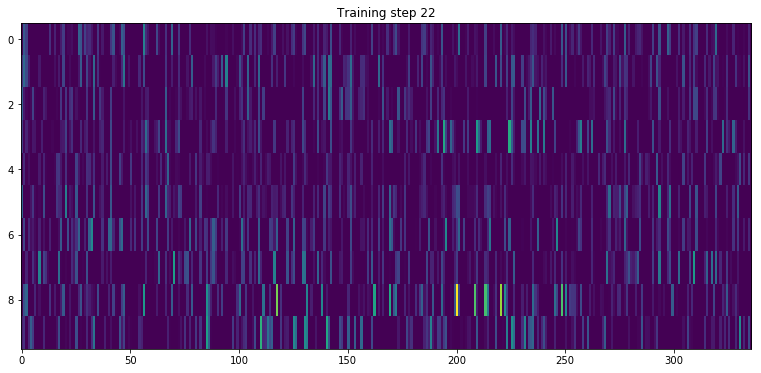

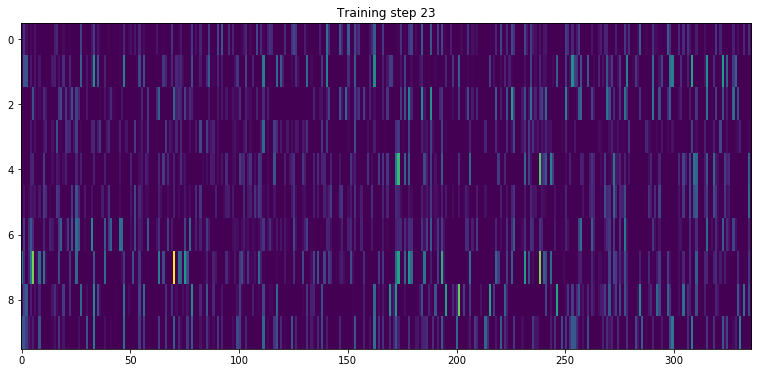

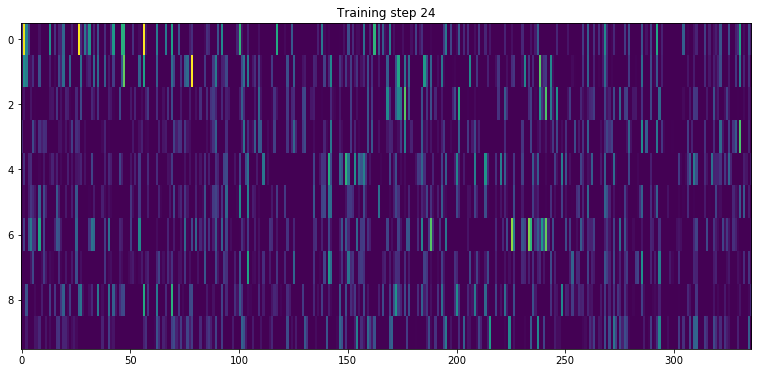

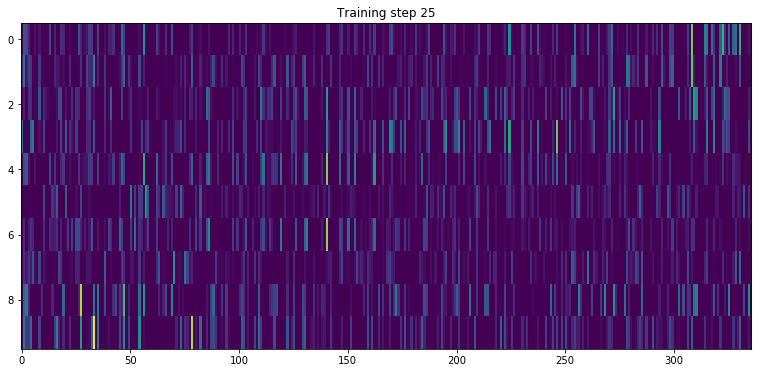

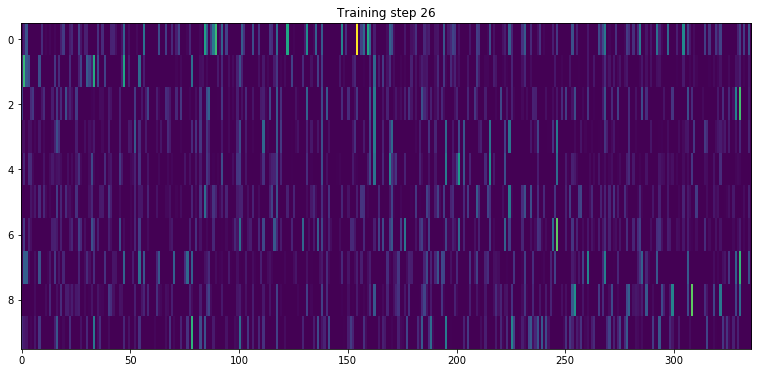

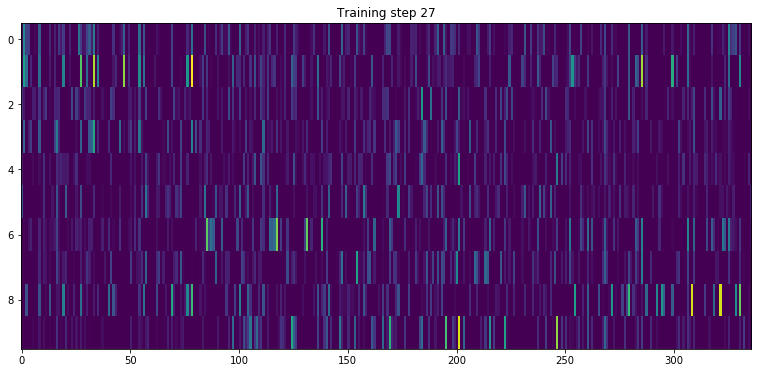

In [237]:
create_image_sequence_from_matrix(matrix, list(range(0,matrix.shape[2])))

# It doesn't make sense to sort
Because preferences are not continuous. But we could arrange by order of preference.

In [238]:
last_frame = matrix[:,:,-1].squeeze()

In [265]:
original_order = list(range(0, last_frame.shape[1]))
preferences = np.argmax(last_frame, axis=0)

new_order = []

for stim in range(0,9):
    selected_activations = last_frame[stim,:]
    
    #Sort by their activation to that stimulus
    _, order = zip(*sorted(zip(selected_activations, original_order)))
    
    #Now append the ones who actually preferred that stimulus
    new_order.extend([x for x in order if preferences[x] == stim])
    

In [268]:
matrix_sorted = matrix[:,new_order,:]

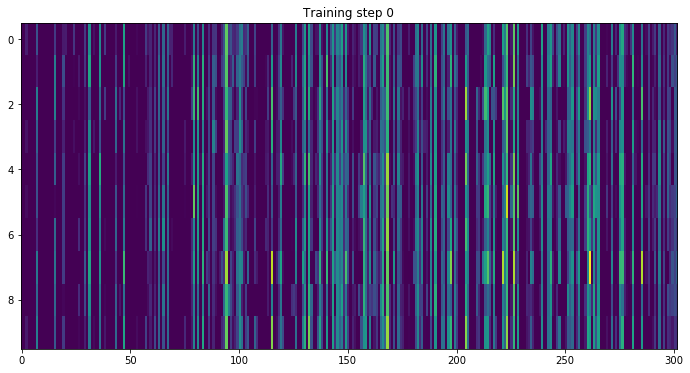

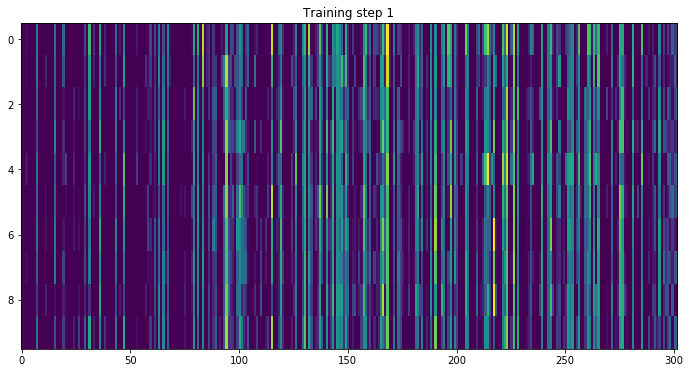

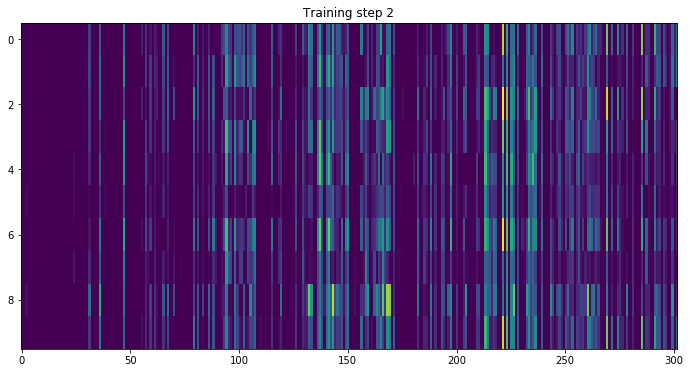

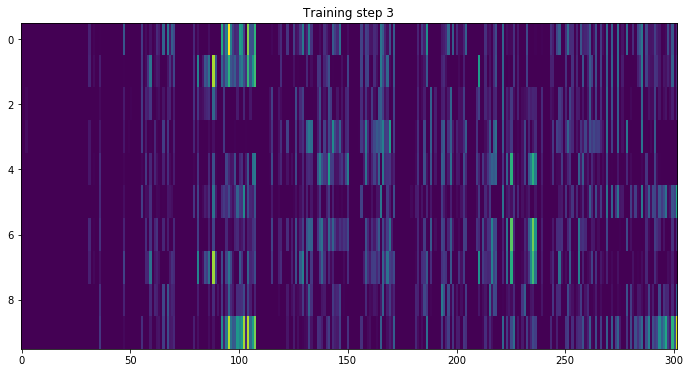

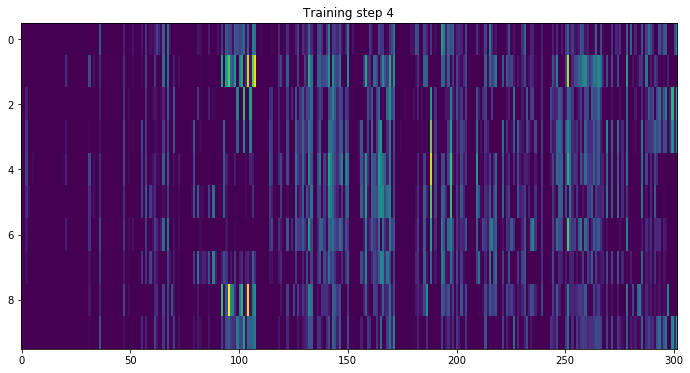

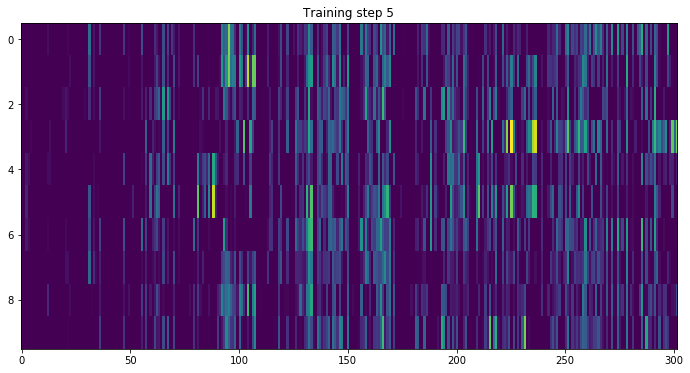

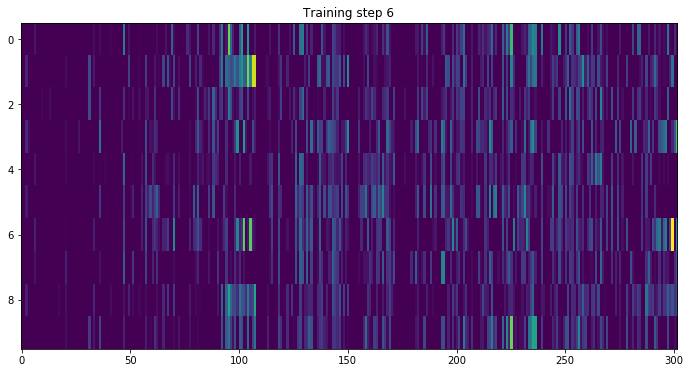

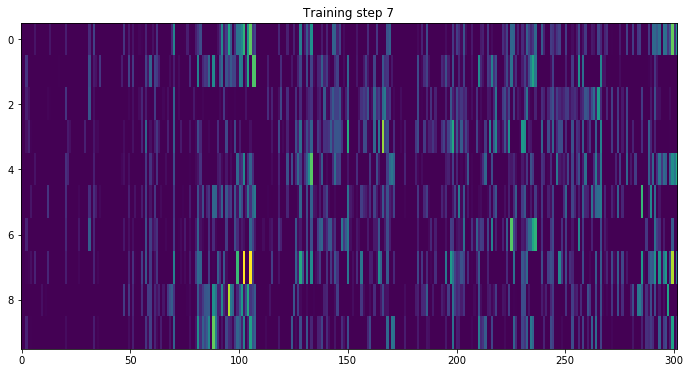

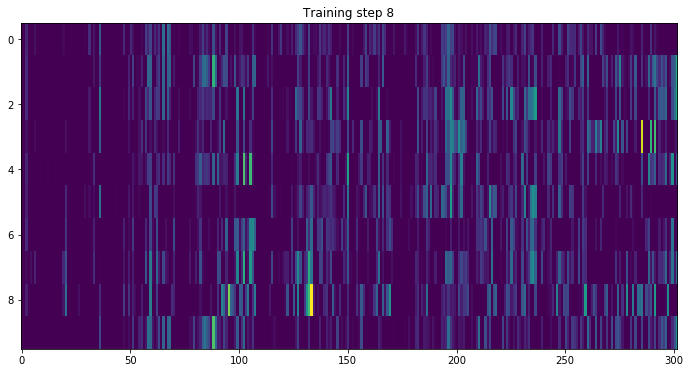

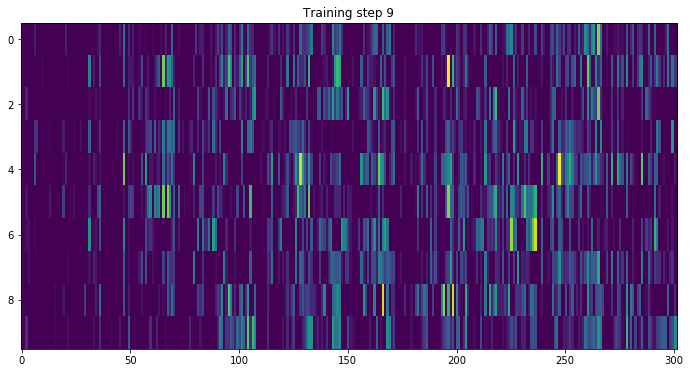

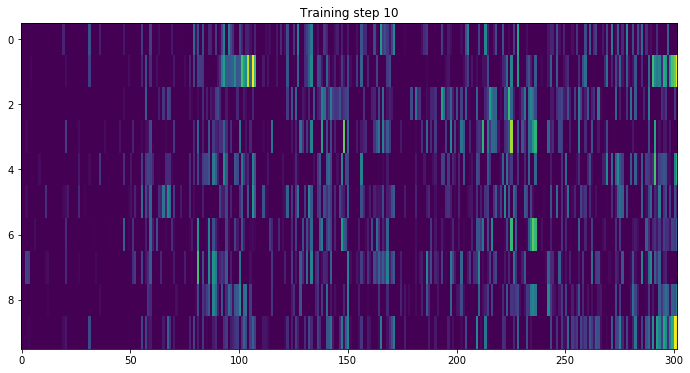

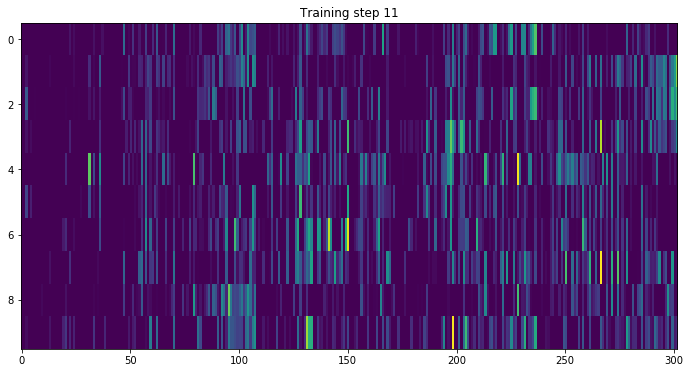

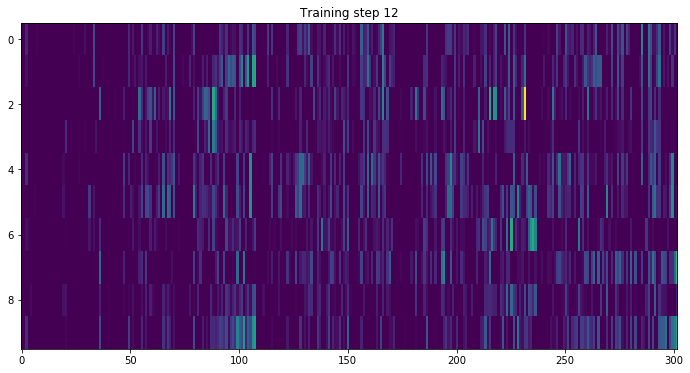

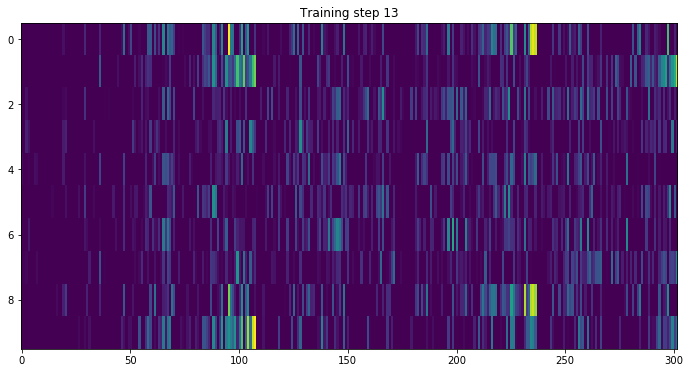

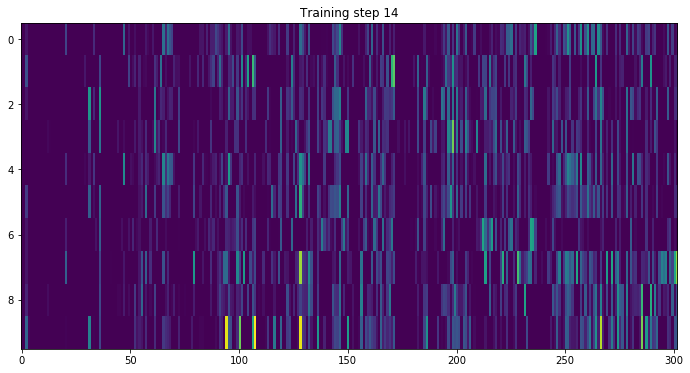

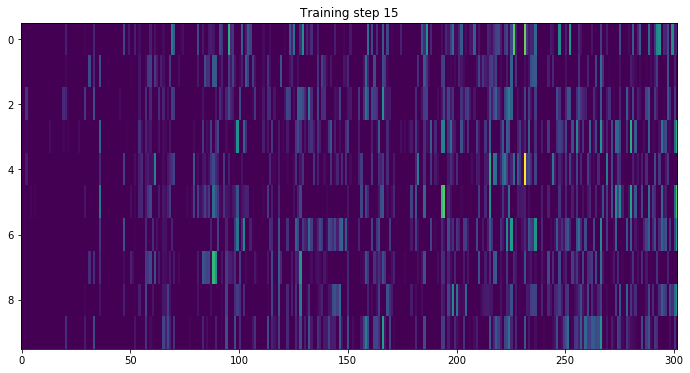

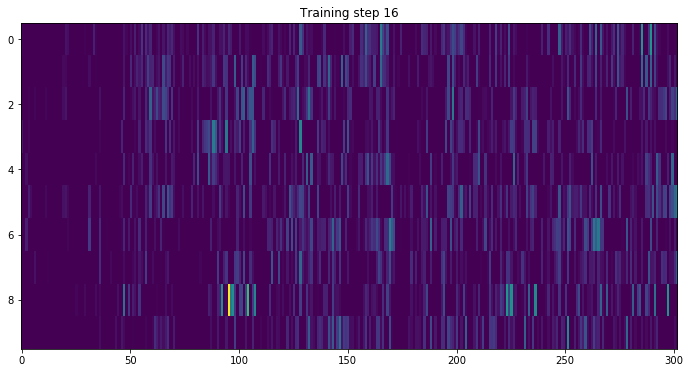

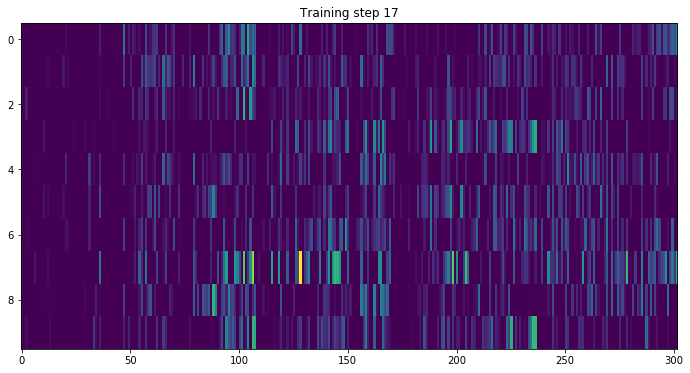

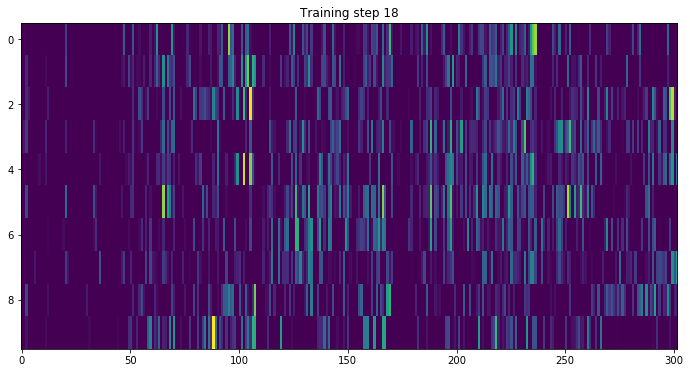

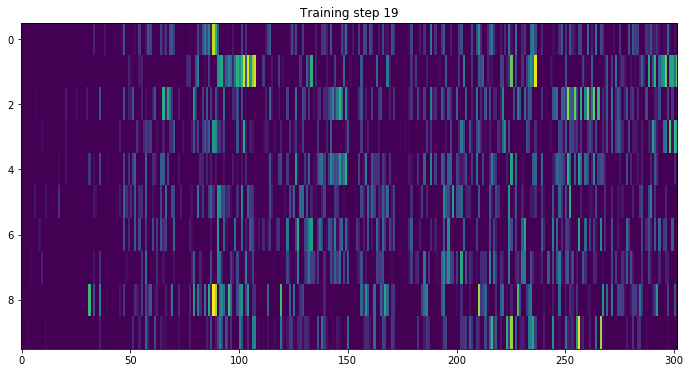

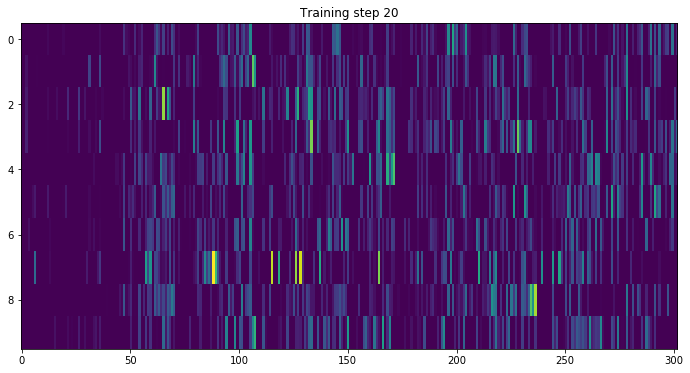

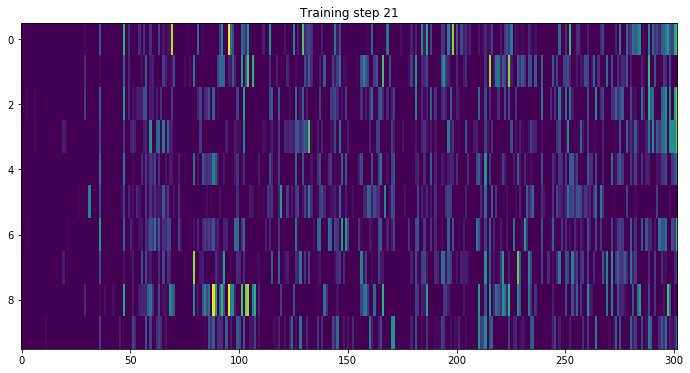

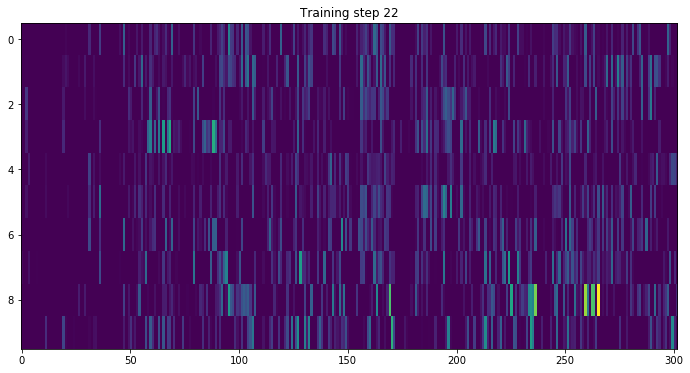

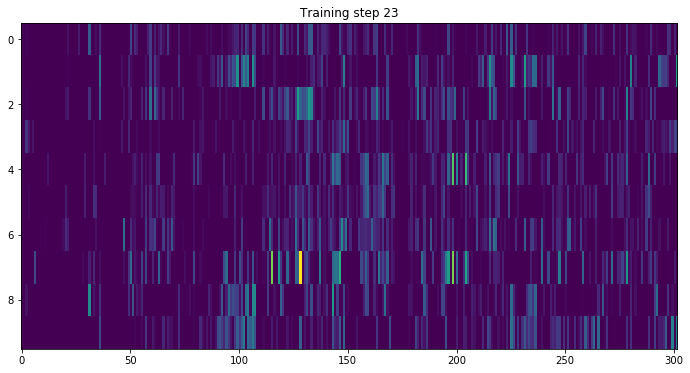

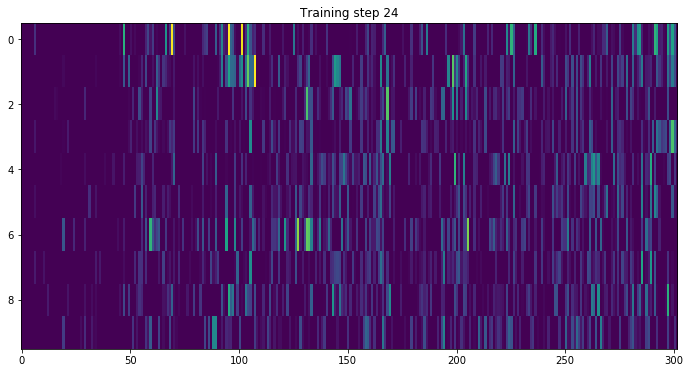

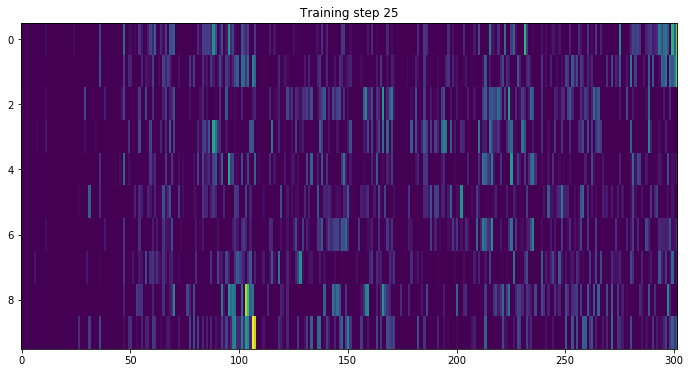

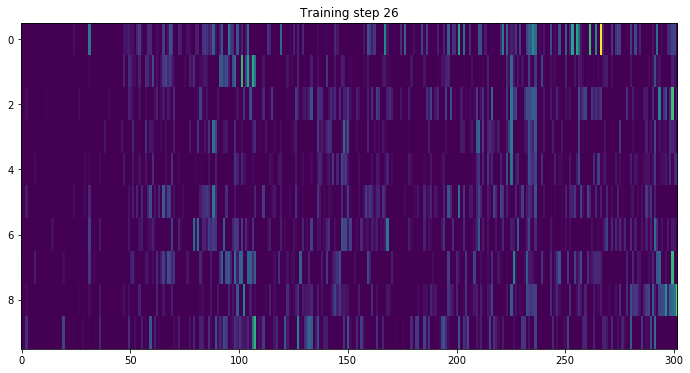

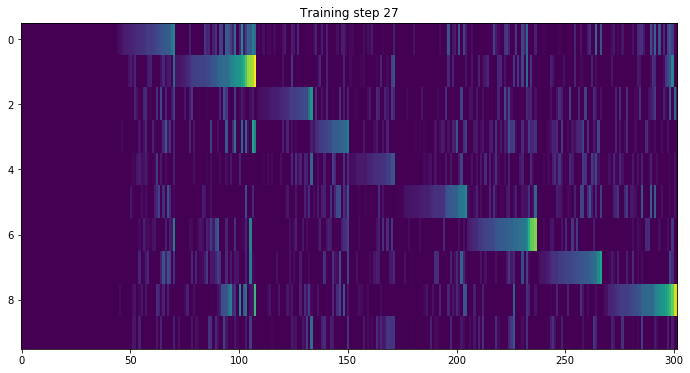

In [269]:
create_image_sequence_from_matrix(matrix_sorted, list(range(0,matrix.shape[2])))

Ok, so that's a pretty bad way of visualizing it

How about a tSNE for each neuron over time?

In [273]:
from sklearn.manifold import TSNE

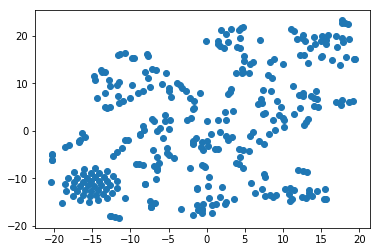

In [295]:
tsne = TSNE(n_components=2, perplexity = 20)
seeded = tsne.fit_transform(matrix[:, :, -1].T)
plt.scatter(seeded[:,0], seeded[:,1], )
plt.show()

In [298]:
# We need to prefit the transform on the final timestep
tsne = TSNE(n_components=2, perplexity = 20)
for t in range(0, matrix.shape[2]):
    if t > 0:
        tsne = TSNE(n_components=2, perplexity = 20, init=tsne_transformed[:,:,t-1].squeeze())
    m = matrix[:, :, t].T
    tsne_transformed[:,:,t] = tsne.fit_transform(m)
    print(t)
    
# Now each neuron is defined by a point in 10d space, i.e. it's response to the 10 different stimuli

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


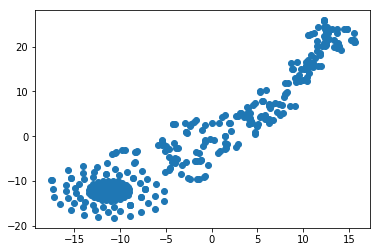

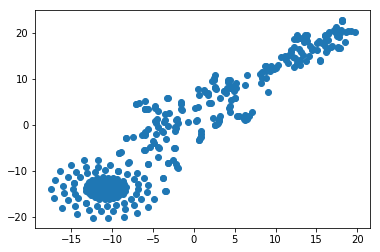

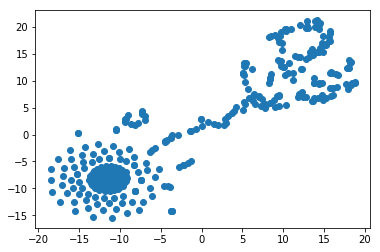

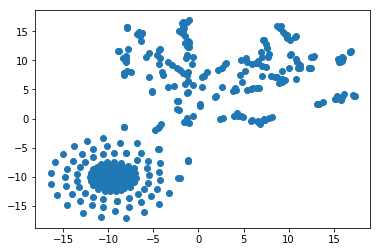

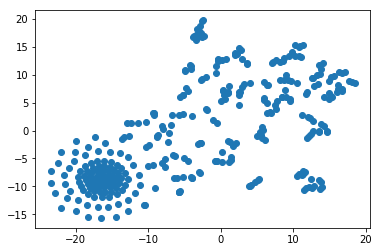

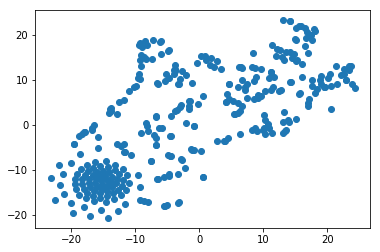

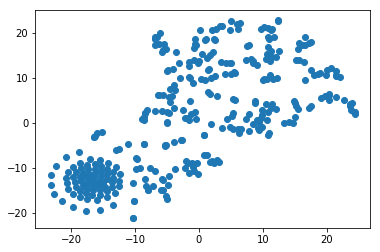

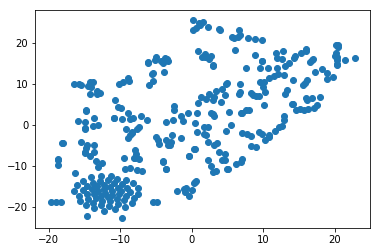

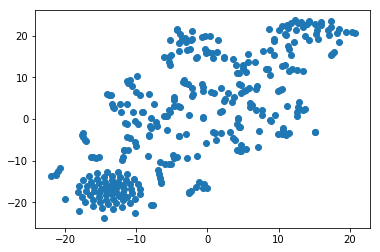

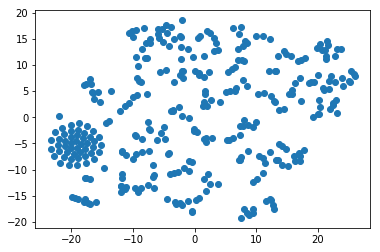

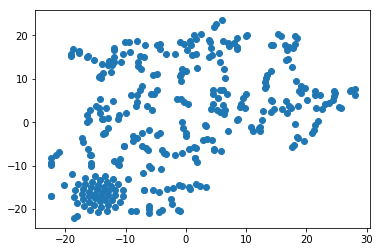

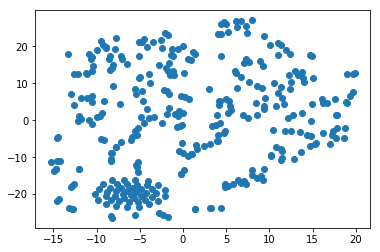

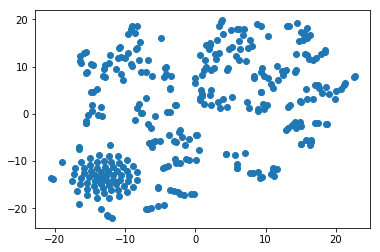

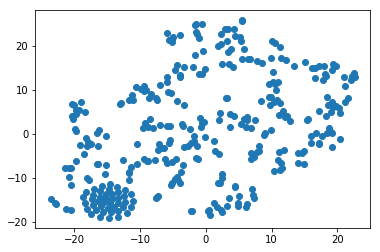

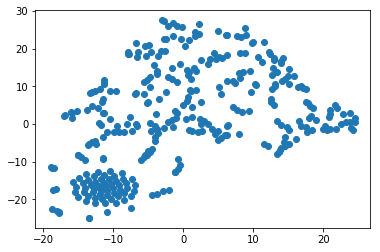

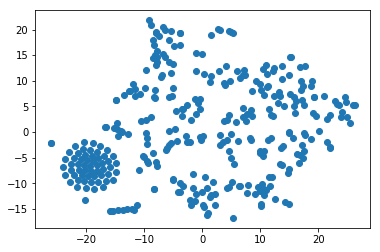

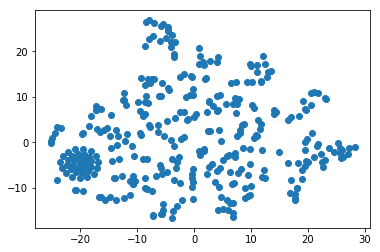

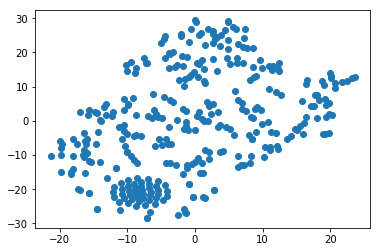

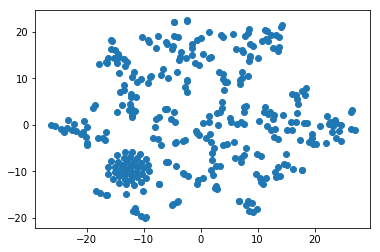

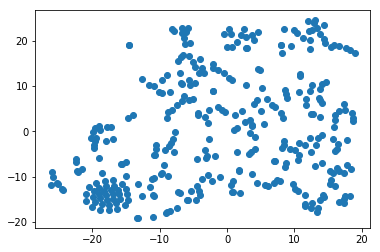

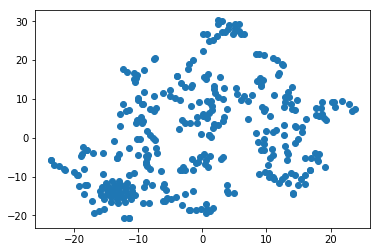

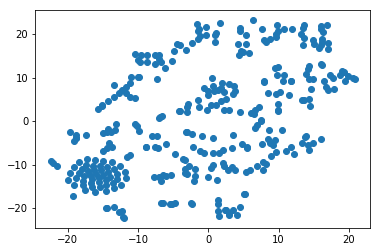

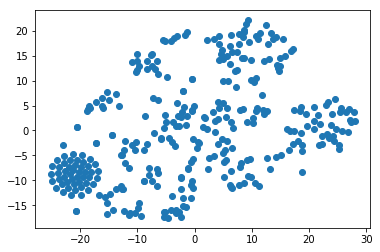

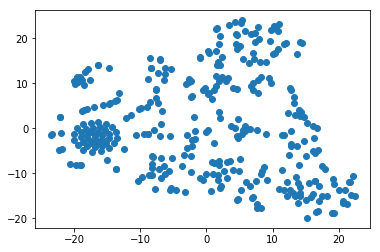

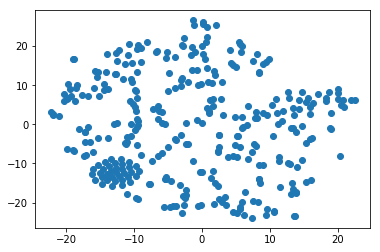

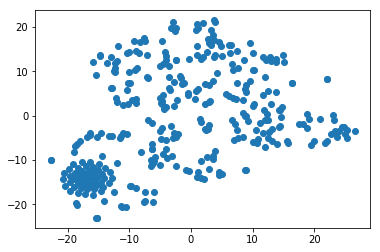

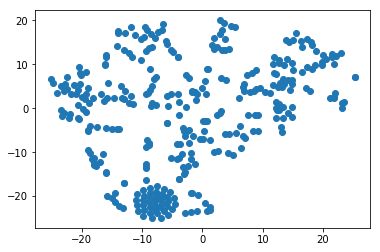

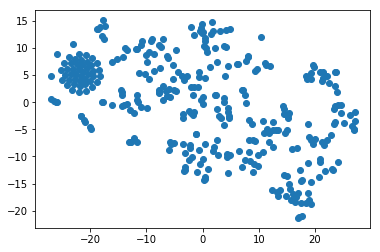

In [297]:
for t in range(0, matrix.shape[2]):
    plt.scatter(tsne_transformed[:,0, t], tsne_transformed[:,1, t], )
    plt.show()

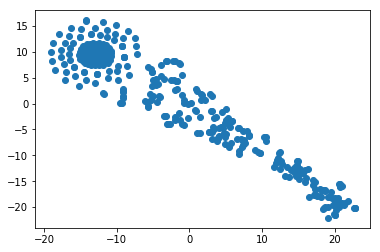

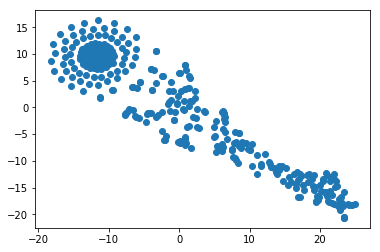

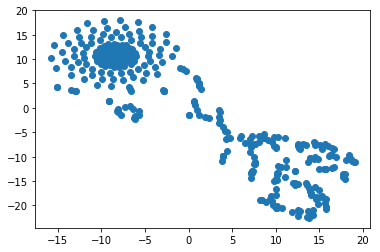

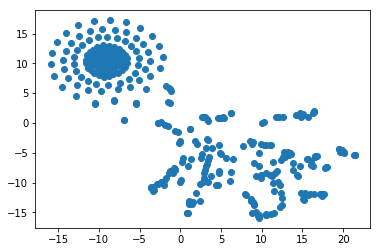

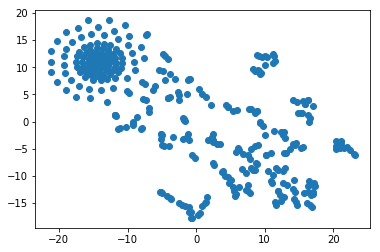

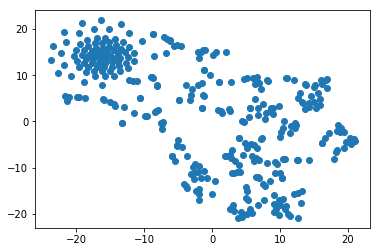

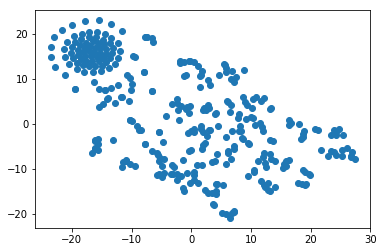

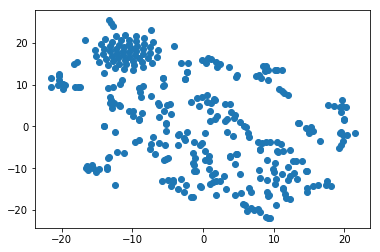

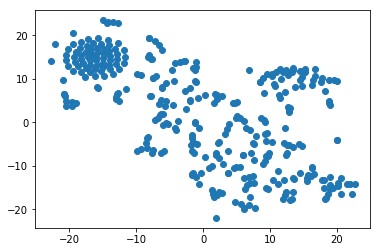

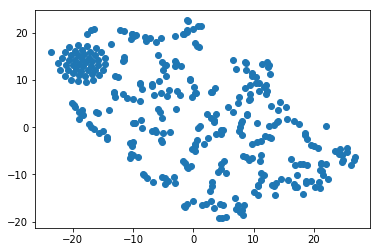

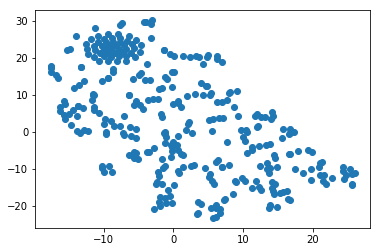

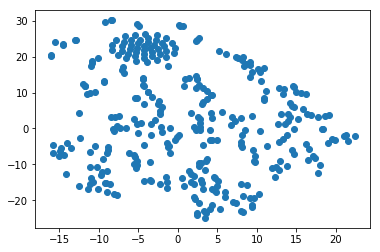

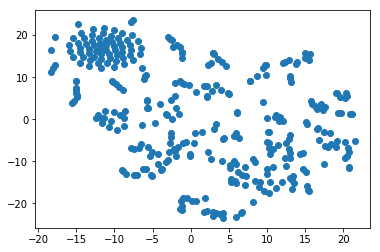

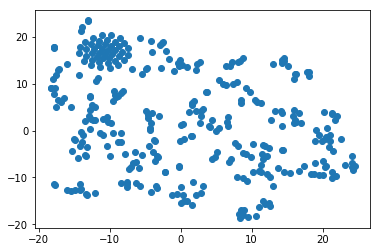

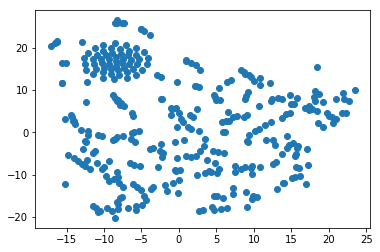

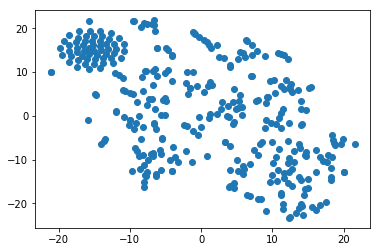

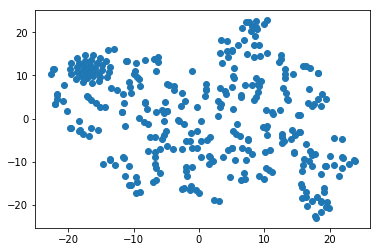

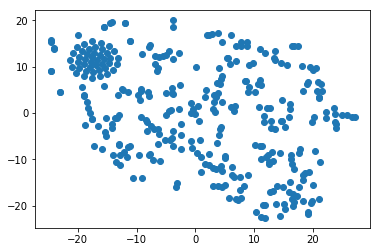

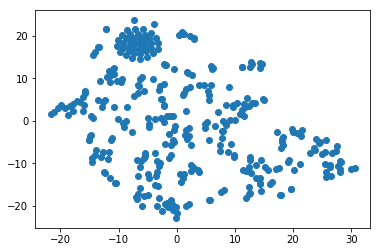

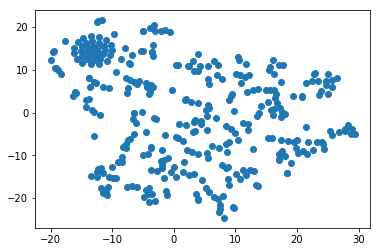

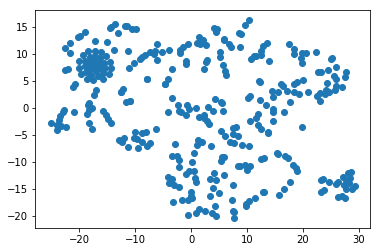

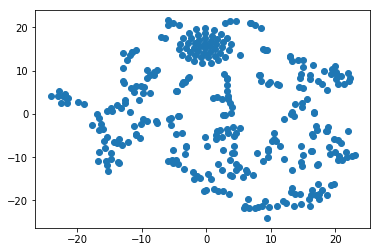

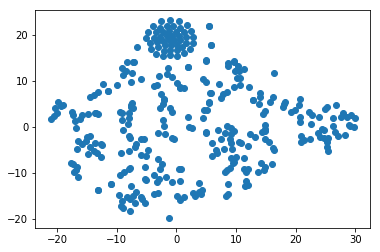

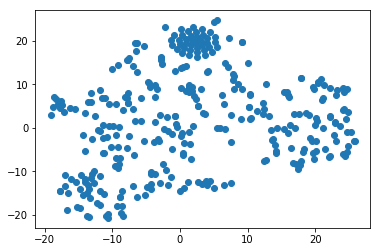

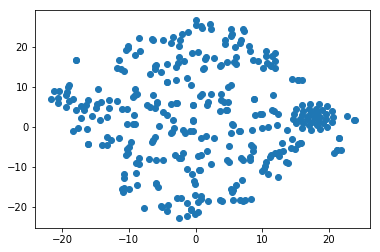

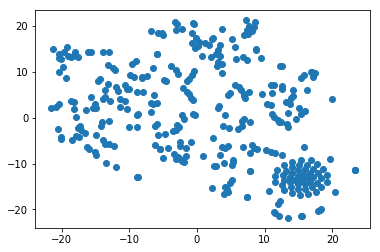

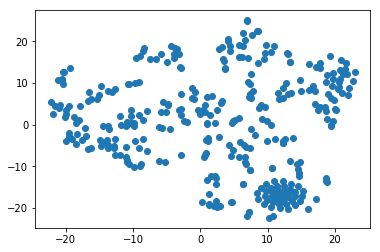

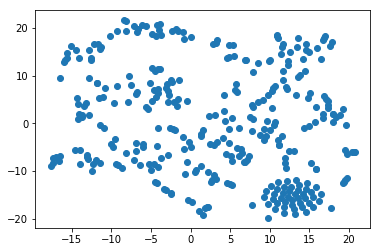

In [299]:
for t in range(0, matrix.shape[2]):
    plt.scatter(tsne_transformed[:,0, t], tsne_transformed[:,1, t], )
    plt.show()

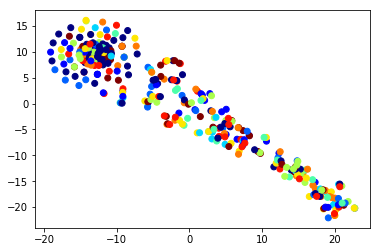

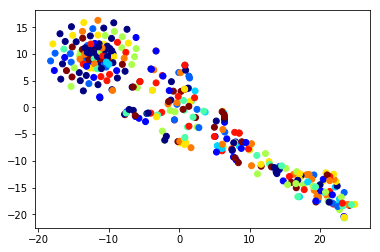

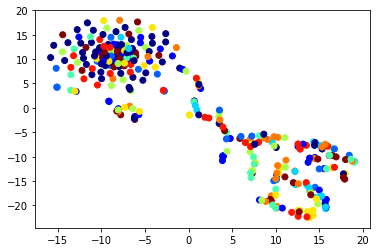

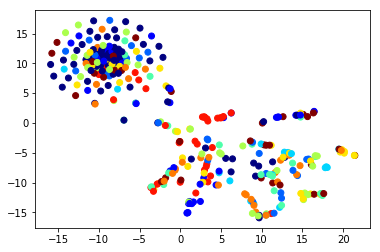

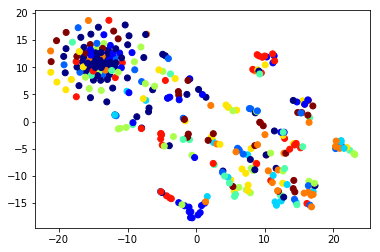

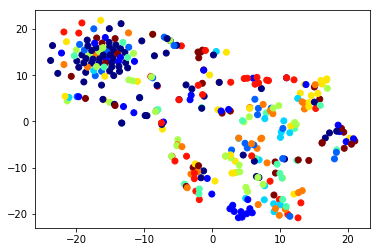

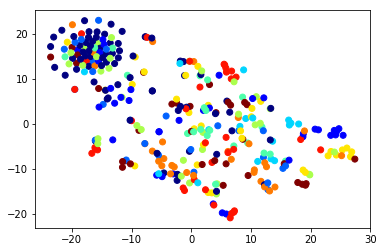

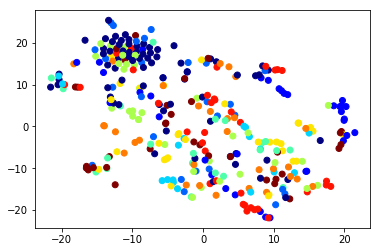

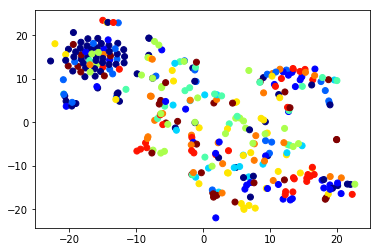

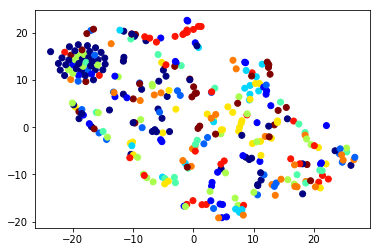

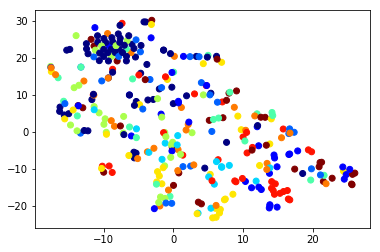

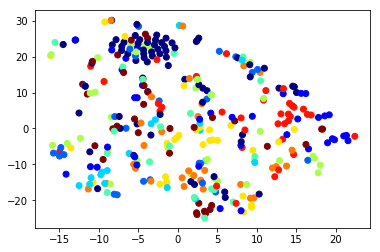

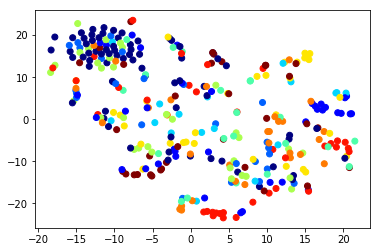

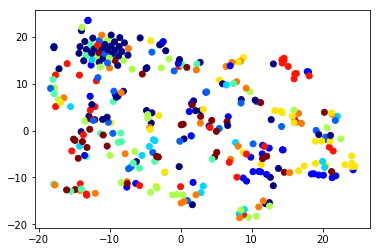

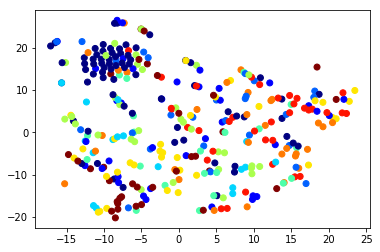

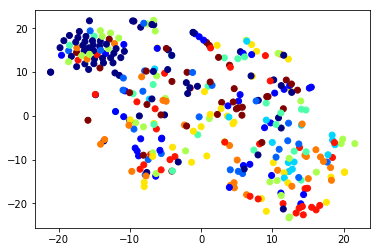

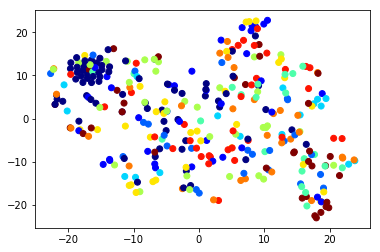

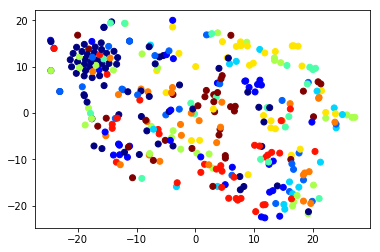

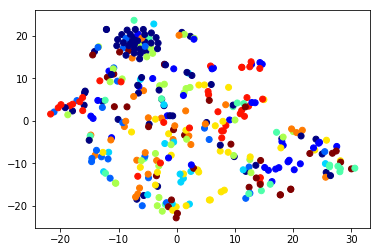

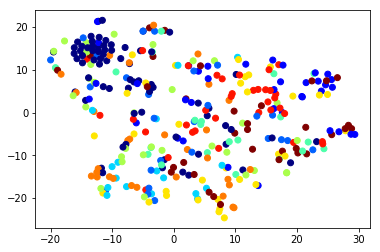

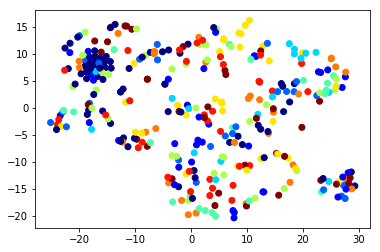

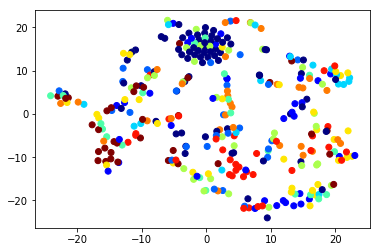

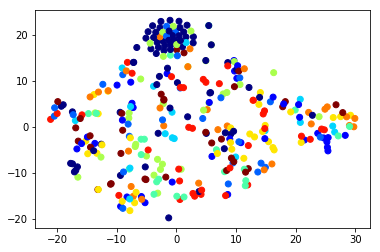

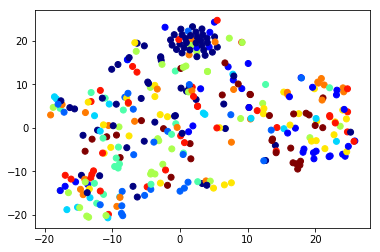

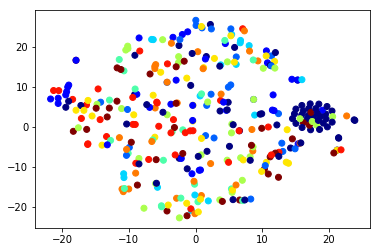

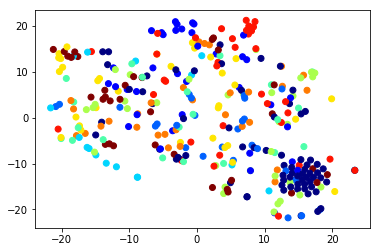

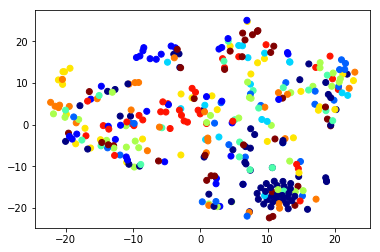

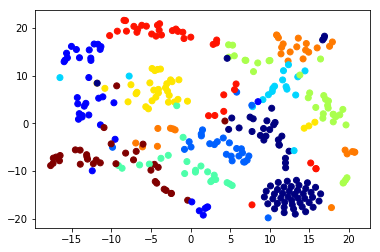

In [311]:
colors = np.random.rand(tsne_transformed.shape[0],3)
for t in range(0, matrix.shape[2]):
    plt.scatter(tsne_transformed[:,0, t], tsne_transformed[:,1, t], c=preferences/max(preferences), cmap='jet')
    plt.show()

In [305]:
preferences

array([5, 1, 1, 0, 3, 2, 2, 2, 1, 5, 4, 2, 0, 8, 5, 3, 3, 0, 4, 1, 5, 4, 0,
       2, 8, 2, 0, 1, 0, 2, 1, 0, 3, 1, 0, 1, 0, 6, 7, 0, 8, 7, 8, 1, 0, 3,
       0, 1, 0, 1, 7, 0, 6, 7, 1, 5, 1, 5, 5, 0, 0, 1, 8, 7, 2, 7, 5, 3, 5,
       8, 2, 5, 5, 7, 9, 2, 1, 2, 1, 0, 3, 0, 3, 1, 5, 6, 6, 6, 6, 7, 9, 5,
       6, 4, 8, 0, 0, 9, 8, 6, 8, 7, 9, 3, 8, 9, 6, 4, 9, 8, 4, 3, 0, 2, 6,
       6, 6, 6, 9, 6, 9, 0, 7, 0, 9, 9, 9, 0, 0, 1, 6, 6, 0, 6, 0, 5, 1, 4,
       6, 8, 9, 8, 4, 0, 0, 7, 9, 7, 1, 5, 9, 4, 8, 9, 7, 8, 4, 5, 5, 7, 7,
       9, 6, 0, 8, 0, 9, 3, 0, 9, 6, 7, 3, 5, 4, 5, 4, 0, 8, 0, 0, 1, 2, 9,
       2, 3, 7, 1, 2, 7, 0, 0, 1, 3, 0, 9, 1, 0, 9, 0, 7, 9, 5, 9, 0, 2, 3,
       0, 7, 0, 1, 9, 0, 7, 7, 9, 0, 9, 2, 5, 7, 0, 9, 2, 1, 2, 7, 5, 0, 5,
       1, 5, 0, 6, 0, 7, 4, 1, 5, 2, 0, 2, 2, 5, 1, 7, 9, 0, 4, 0, 4, 2, 6,
       1, 8, 1, 9, 6, 6, 2, 6, 0, 6, 5, 0, 8, 0, 7, 9, 7, 5, 8, 4, 2, 1, 5,
       8, 9, 8, 8, 7, 8, 1, 1, 0, 1, 0, 8, 0, 9, 5, 0, 8, 5, 8, 8, 0, 2, 0,
       1, 0,